# Export and import of FOB, CIF, Packages and Weight per month and year

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import seaborn as sns

### How much we import from everything by month?

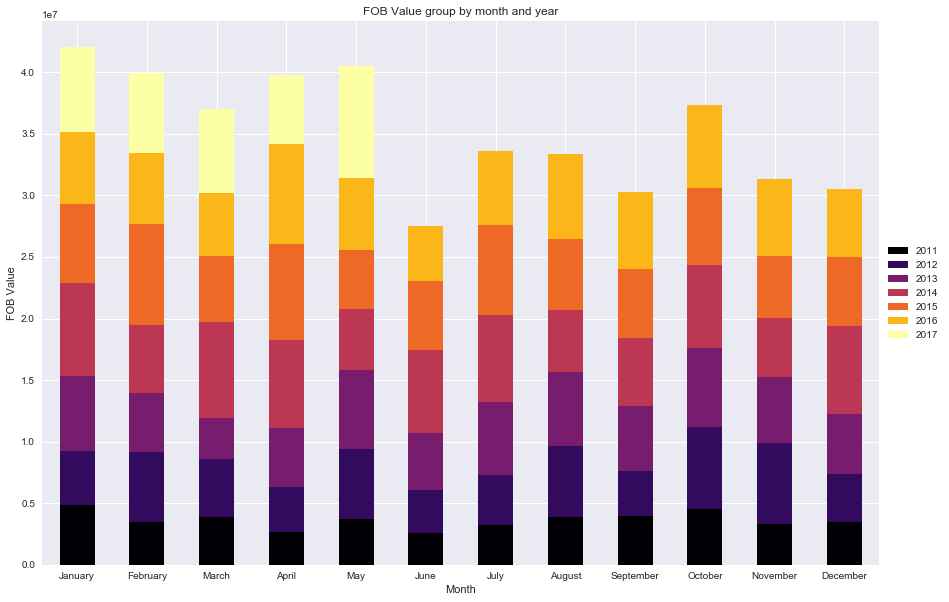

              FOB                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      4888064.52  4353771.09  6056777.17  7593420.97  6435721.54  5818110.82  6896279.64
2      3450575.52  5703834.57  4767096.52  5537482.79  8176762.76  5772075.39  6507211.18
3      3911041.20  4685263.50  3343083.91  7750286.29  5394308.64  5111160.93  6822647.56
4      2690670.68  3639448.90  4745804.12  7172800.94  7836499.29  8119641.77  5587168.40
5      3697685.28  5701992.48  6404855.68  4969624.94  4777626.95  5844976.14  9149954.24
6      2561076.61  3541822.71  4640203.94  6730891.89  5580839.37  4419497.19         NaN
7      3247977.19  4042974.55  5890539.64  7138703.79  7247801.56  6030621.24         NaN
8      3854440.07  5809325.56  5969979.44  5024861.50  5762165.54  6965501.99         NaN
9      393

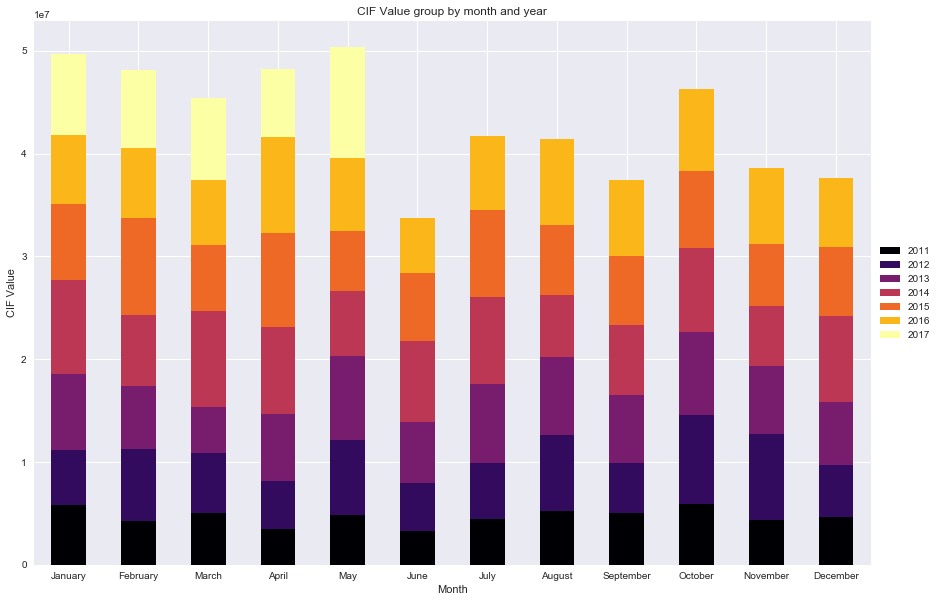

              CIF                                                                         
YEAR         2011        2012        2013        2014        2015        2016         2017
MONTH                                                                                     
1      5788826.23  5390142.53  7425242.24  9086683.71  7446918.24  6682989.51   7906739.88
2      4258901.06  7023524.47  6151110.28  6889484.24  9367644.79  6822076.78   7599280.72
3      5002774.74  5853021.06  4487453.87  9338368.71  6442432.00  6316859.95   7971047.63
4      3527406.52  4657493.18  6442853.00  8465647.26  9137682.21  9399125.26   6573287.11
5      4849164.79  7334784.70  8166651.89  6298692.18  5856676.69  7089862.08  10760985.12
6      3334255.05  4589594.77  5937640.67  7892044.24  6668873.34  5297046.20          NaN
7      4409952.99  5463302.99  7711901.70  8443542.90  8456135.51  7185575.28          NaN
8      5193046.69  7447225.82  7553920.69  6089394.61  6811595.54  8277305.19          NaN

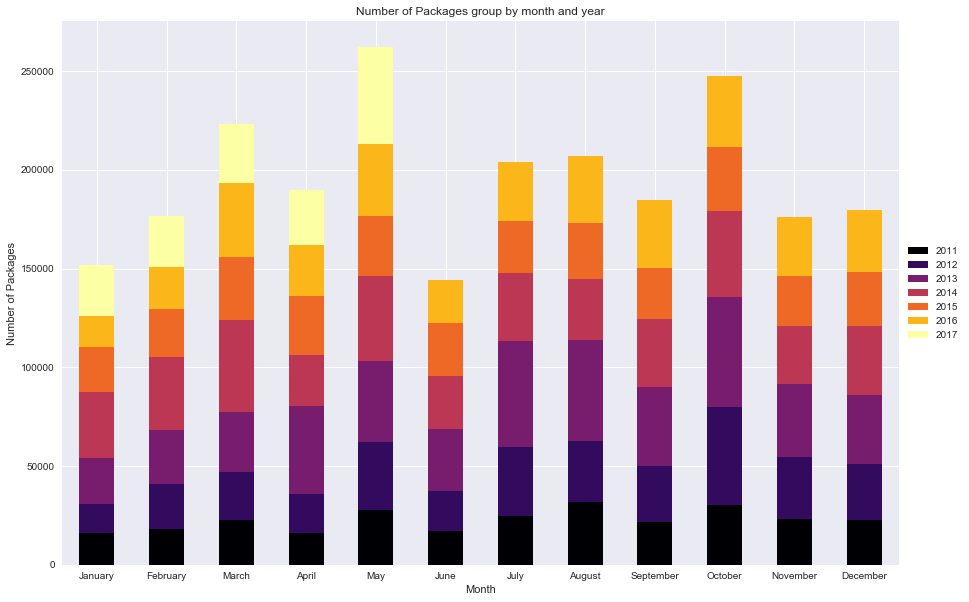

      CANT_BUL1                                                      
YEAR       2011     2012     2013     2014     2015     2016     2017
MONTH                                                                
1       16320.0  14686.0  23087.0  33507.0  22815.0  15766.0  25712.0
2       18209.0  22949.0  26909.0  37014.0  24346.0  21530.0  25824.0
3       22912.0  23923.0  30293.0  46770.0  32083.0  37127.0  30071.0
4       16247.0  19517.0  44604.0  25993.0  29927.0  25747.0  27854.0
5       27814.0  34508.0  40764.0  43291.0  29998.0  36498.0  49239.0
6       17102.0  20416.0  31104.0  27139.0  26510.0  21916.0      NaN
7       24776.0  34802.0  53779.0  34519.0  25938.0  30067.0      NaN
8       31544.0  30946.0  51450.0  30988.0  28184.0  33666.0      NaN
9       21750.0  28242.0  40079.0  34324.0  25931.0  34229.0      NaN
10      30238.0  49404.0  55785.0  43703.0  32194.0  36306.0      NaN
11      23379.0  31284.0  36760.0  29468.0  25314.0  29635.0      NaN
12      22453.0  288

In [32]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["YEAR", "MONTH", "FOB", "CIF", "CANT_BUL1"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)

colors = plt.cm.inferno(np.linspace(0, 1, 7))

for element,text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("CANT_BUL1", "Number of Packages")]:
    
    new_data_grouper = data[["YEAR", "MONTH", element]].groupby(['MONTH','YEAR']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10), color=colors)

    plot.set_title(text + " group by month and year")
    plot.set_xlabel("Month")
    plot.set_ylabel(text)
    
    plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")

    plt.show()
    
    print(new_data_grouper.unstack().to_string())

### How much we export from everything by month?

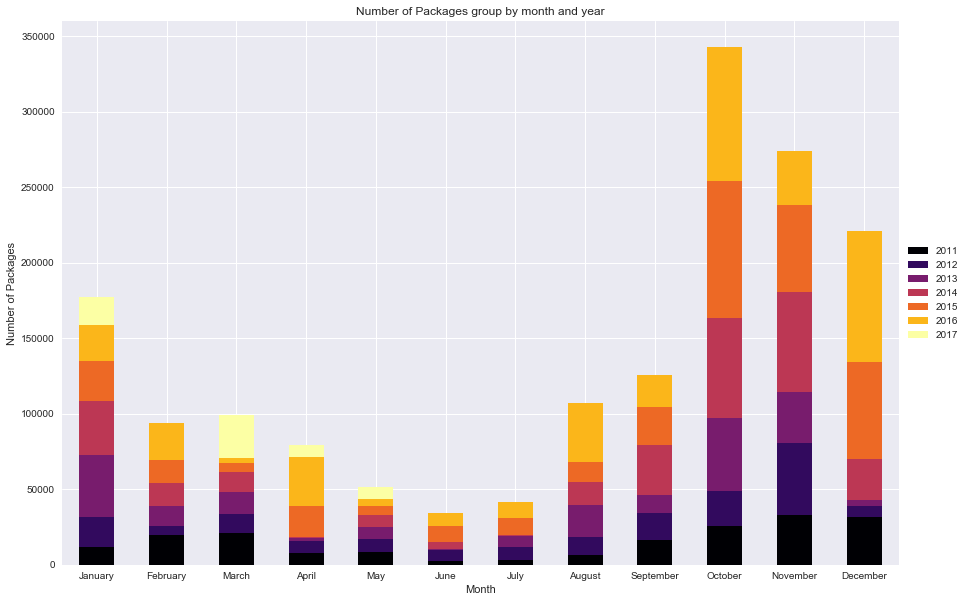

      TOTALBULTOS                                                      
YEAR         2011     2012     2013     2014     2015     2016     2017
MONTH                                                                  
1         11814.0  20144.0  40831.0  35873.0  26504.0  23262.0  19081.0
2         19899.0   5496.0  13537.0  15069.0  15474.0  24127.0    112.0
3         21280.0  12575.0  14088.0  13803.0   5732.0   3516.0  27999.0
4          7910.0   7601.0   1911.0   1165.0  20612.0  32188.0   7589.0
5          8519.0   8861.0   7470.0   8406.0   5714.0   4694.0   7589.0
6          2708.0   7293.0    495.0   4537.0  10942.0   8476.0      NaN
7          2947.0   8516.0   7616.0    696.0  10932.0  10816.0      NaN
8          6566.0  12112.0  21223.0  15103.0  12879.0  38896.0      NaN
9         16106.0  18430.0  11983.0  32872.0  25069.0  21112.0      NaN
10        25909.0  23152.0  48231.0  66295.0  90783.0  88324.0      NaN
11        33009.0  47403.0  33910.0  66436.0  57448.0  35754.0  

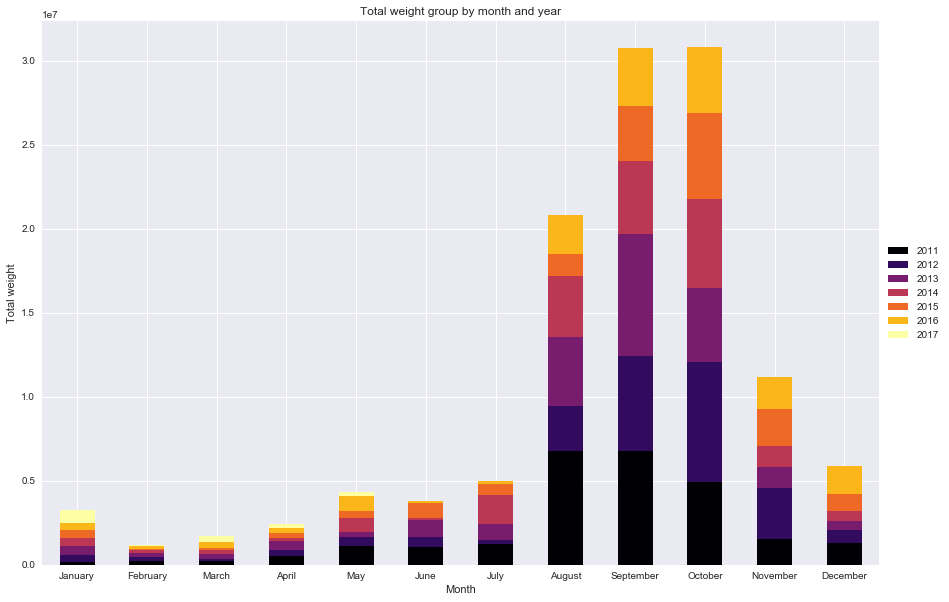

      PESOBRUTOTOTAL                                                                       
YEAR            2011        2012        2013        2014        2015        2016       2017
MONTH                                                                                      
1          137719.00   433791.04   567523.00   475023.84   434040.95   458257.50  771047.50
2          232860.76   243086.00   231484.55   148196.24   108552.00   180932.00   19450.00
3          242495.86   131589.00   268899.00   209502.42   166545.10   332630.00  387888.70
4          499357.72   389936.38   509122.38   210827.40   302592.96   259654.00  234981.99
5         1146257.04   526462.76   259478.54   857770.42   434137.95   850618.60  234981.99
6         1031361.02   628756.15   994887.20   122810.62   877941.00   138261.00        NaN
7         1233315.56   250821.24   951352.75  1738693.44   652876.48   139369.00        NaN
8         6769547.60  2662778.62  4136431.00  3615150.56  1308845.00  2290429.55

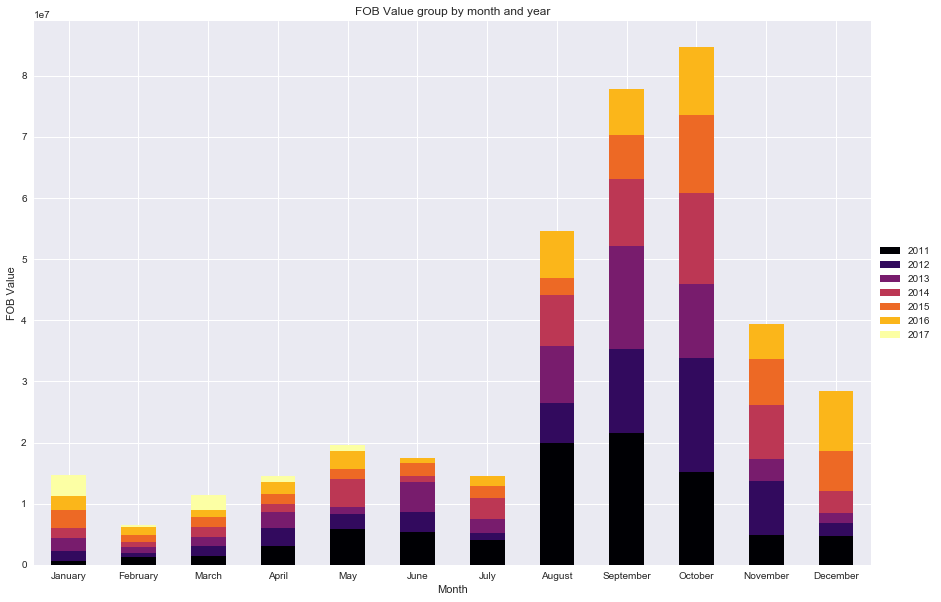

      TOTALVALORFOB                                                                             
YEAR           2011         2012         2013         2014         2015         2016        2017
MONTH                                                                                           
1         633771.50   1598329.59   2107086.84   1749256.18   2826904.04   2332053.99  3390900.34
2        1337215.21    530419.08   1121136.62    754229.17   1200749.60   1253094.90   235976.51
3        1408616.86   1603930.50   1505338.47   1674661.66   1550145.06   1276412.12  2349566.16
4        3044967.48   2936756.11   2630774.97   1251567.52   1679910.47   1987707.48  1020218.33
5        5889633.49   2340735.05   1260529.97   4584001.56   1674119.22   2867808.67  1020218.33
6        5398158.40   3273384.70   4850286.89    971998.41   2226285.47    820890.13         NaN
7        4088699.59   1113580.63   2223747.27   3578765.44   1888158.65   1599692.48         NaN
8       19864016.86   6564086.

In [33]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["YEAR", "MONTH", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)

colors = plt.cm.inferno(np.linspace(0, 1, 7))

for element,text in [("TOTALBULTOS",  "Number of Packages"),
                     ("PESOBRUTOTOTAL", "Total weight"),
                     ("TOTALVALORFOB", "FOB Value")]:
    
    new_data_grouper = data[["YEAR", "MONTH", element]].groupby(['MONTH','YEAR']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',stacked=True,figsize=(15, 10), color=colors)

    plot.set_title(text + " group by month and year")
    plot.set_xlabel("Month")
    plot.set_ylabel(text)
    
    plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")

    plt.show()
    print(new_data_grouper.unstack().to_string())

### How much we import and export from everything by year?

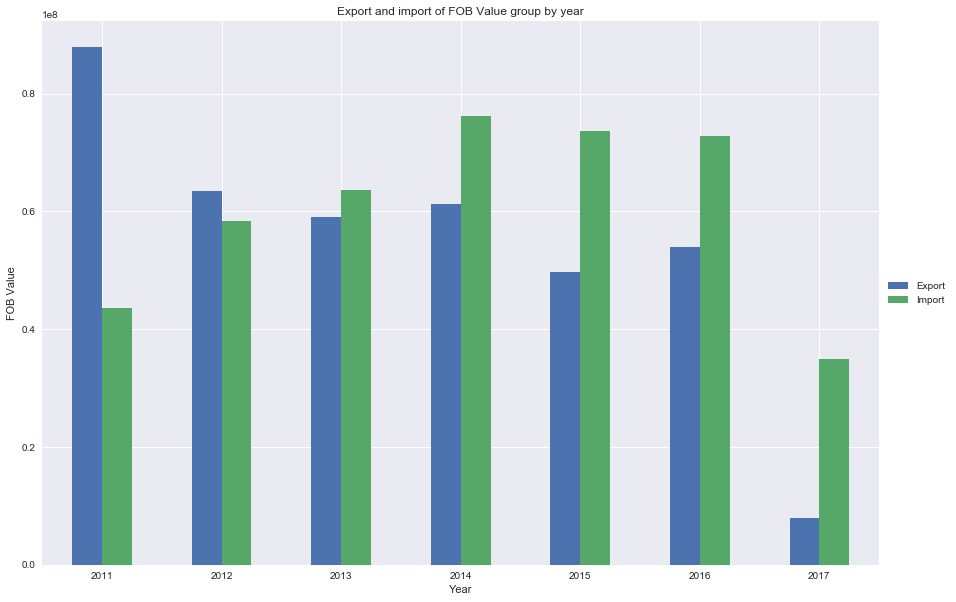

              FOB              
TYPE       Export        Import
YEAR                           
2011  87902763.20  4.359978e+07
2012  63489772.60  5.831186e+07
2013  59059207.23  6.370029e+07
2014  61312003.60  7.612015e+07
2015  49745925.77  7.372573e+07
2016  53984026.11  7.284431e+07
2017   8016879.67  3.496326e+07


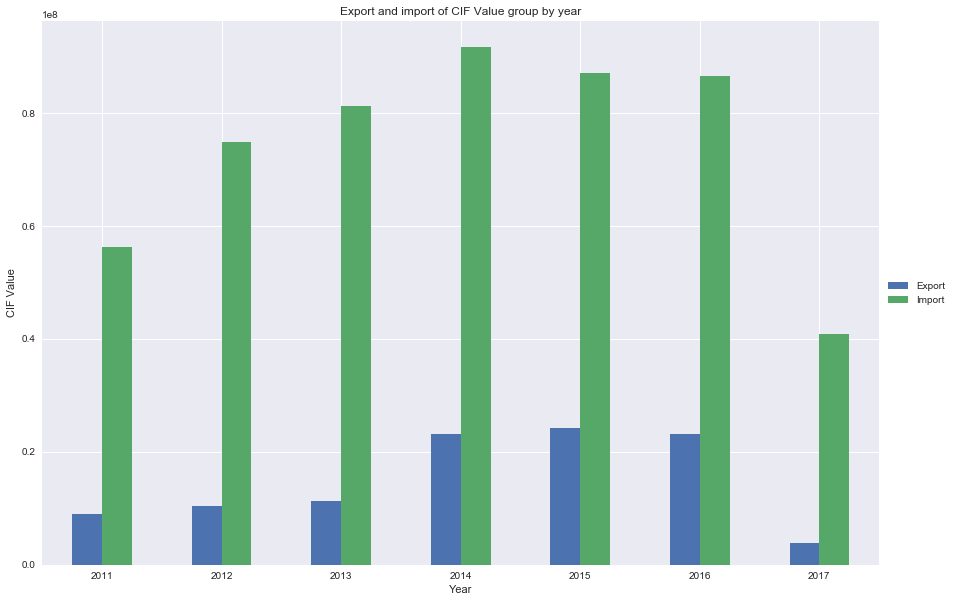

              CIF             
TYPE       Export       Import
YEAR                          
2011   8987784.92  56298948.70
2012  10351256.05  74800266.45
2013  11238537.72  81241189.81
2014  23237790.89  91677274.02
2015  24198242.43  87119961.23
2016  23128424.36  86529224.41
2017   3948480.56  40811340.46


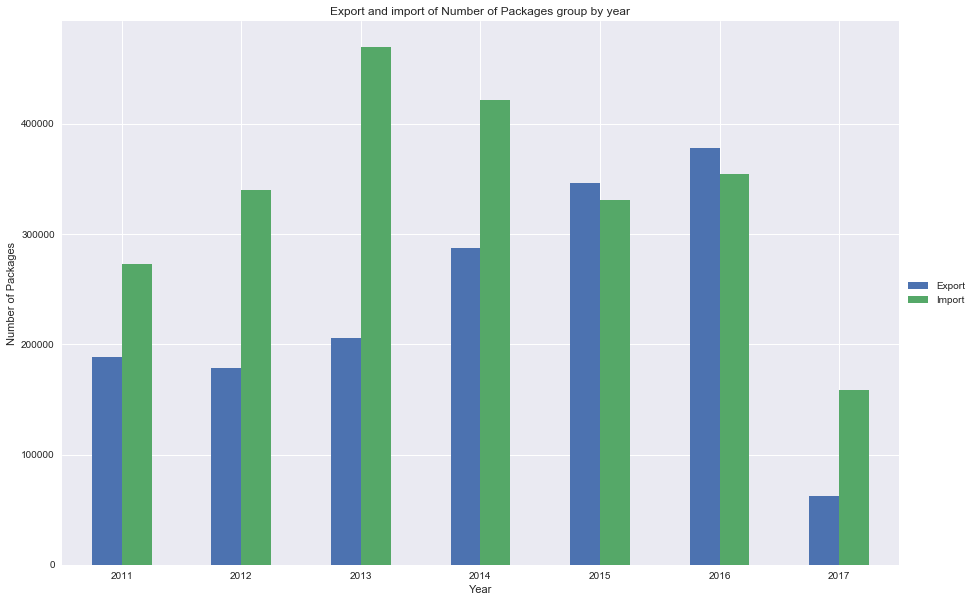

      BULTOS        
TYPE  Export  Import
YEAR                
2011  188346  272744
2012  178525  339494
2013  205771  469559
2014  287442  421354
2015  346058  330575
2016  377921  354128
2017   62370  158700


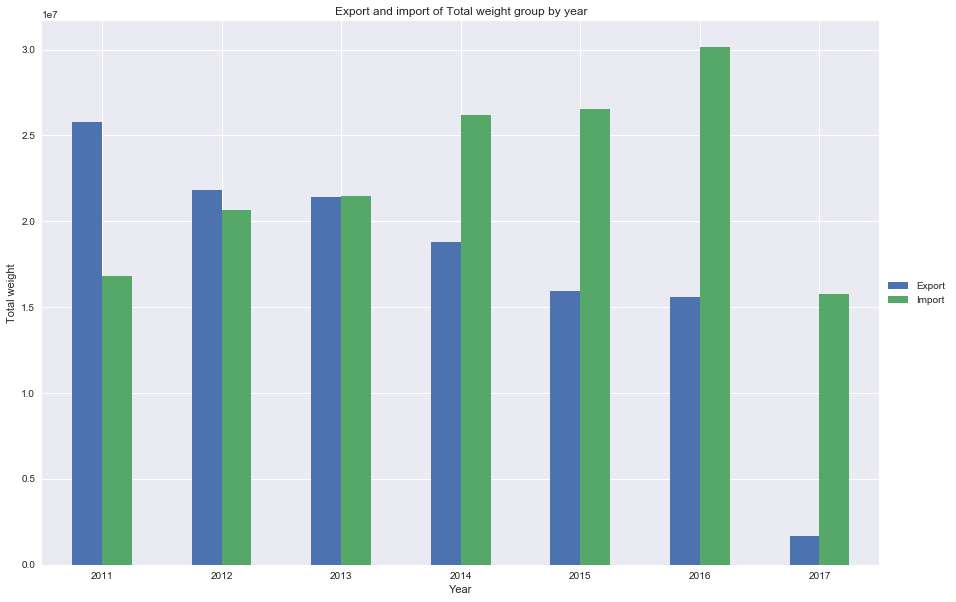

             PESO             
TYPE       Export       Import
YEAR                          
2011  25791005.12  16794463.76
2012  21849228.26  20652094.17
2013  21424588.64  21481549.16
2014  18810986.01  26178000.92
2015  15923014.51  26543725.79
2016  15605381.99  30147534.34
2017   1648350.18  15786260.48


In [22]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"

usecols_export =  ["YEAR", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB", "VALORCIF"]
usecols_import =  ["YEAR", "FOB", "CIF", "CANT_BUL1", "TOT_PESO"]

data_import = pd.read_csv(filename_import, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['BULTOS', 'PESO', 'FOB', 'CIF', 'YEAR', 'TYPE']

data_import.columns = ['FOB', 'PESO', 'CIF', 'BULTOS', 'YEAR', 'TYPE']

final_data = pd.concat([data_import, data_export])

for element, text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("BULTOS", "Number of Packages"),
                     ("PESO", "Total weight")]:
        
    new_data_grouper = final_data[["YEAR", "TYPE", element]].groupby(["YEAR", 'TYPE']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',figsize=(15, 10))

    plot.set_title("Export and import of " + text + " group by year")
    plot.set_xlabel("Year")
    plot.set_ylabel(text)
    
    plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")

    plt.show()
    print(new_data_grouper.unstack().to_string())

### How much we import from A, B, C, D and E by month?

-------------------------------------------------- FOB Value --------------------------------------------------


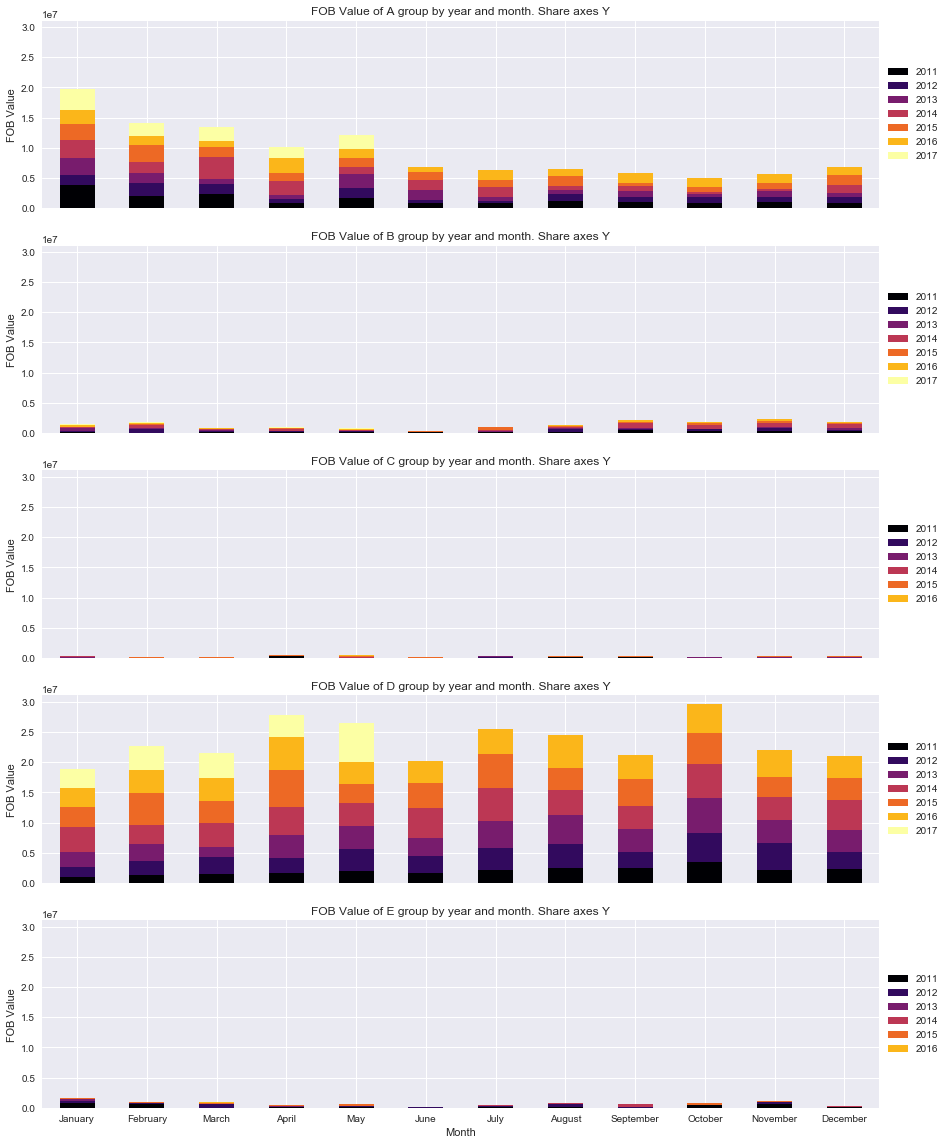

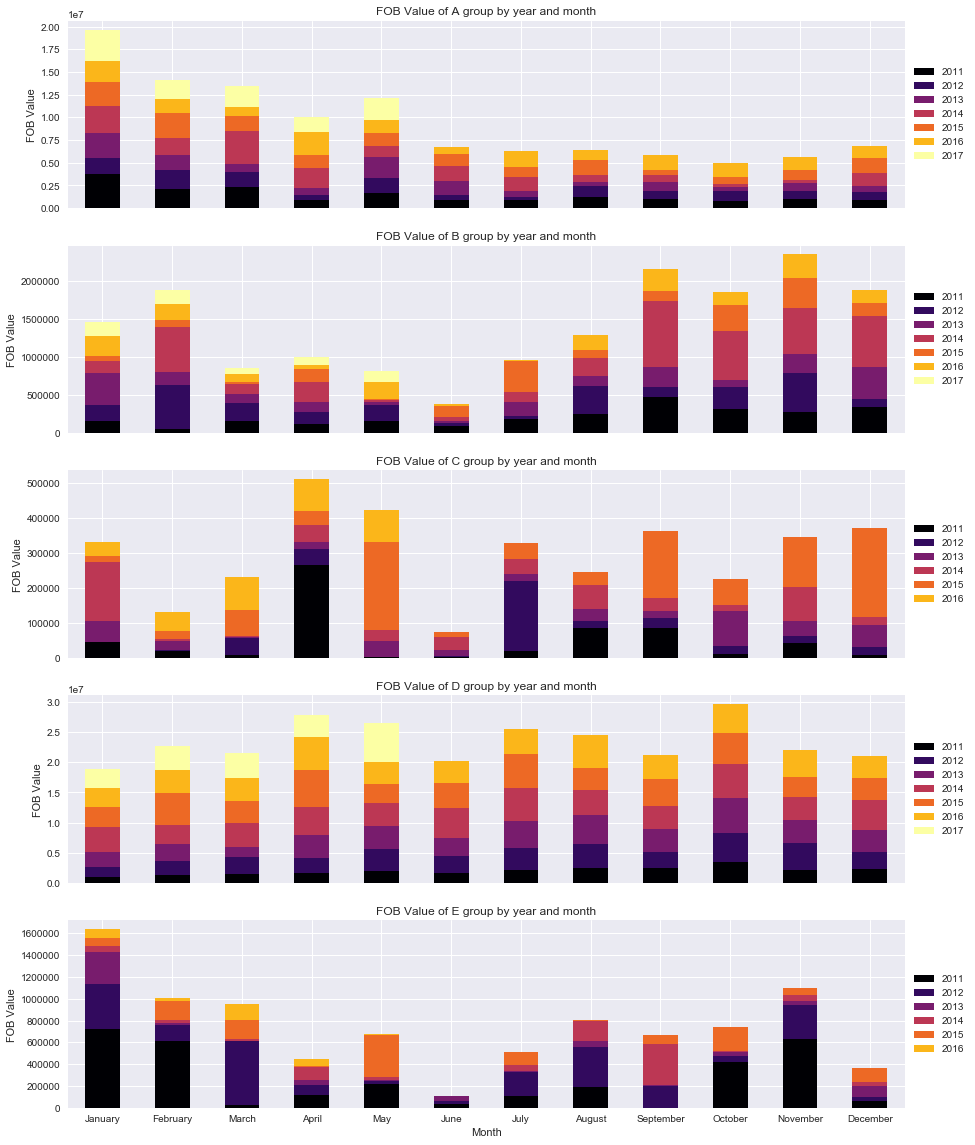

----- FOB Value del grupo A ------

              FOB                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      3788916.57  1679208.51  2807393.45  2942646.71  2699949.62  2336248.05  3421637.99
2      2058509.54  2165443.14  1667329.69  1801379.71  2778893.36  1519164.39  2152828.53
3      2284781.65  1667453.22   862736.50  3668023.88  1713232.51   917408.09  2362549.93
4       904995.82   575392.42   735908.98  2242917.44  1385293.39  2520285.14  1692921.28
5      1613874.69  1667000.83  2366811.69  1187937.90  1462795.49  1448695.97  2422877.84
6       870743.95   538602.39  1608818.44  1648144.65  1301379.88   798477.27         NaN
7       889568.08   330055.73   694285.48  1547420.51  1112758.30  1692204.48         NaN
8      1205073.00  1170286.96   539439.83   682972.97  1662705.3

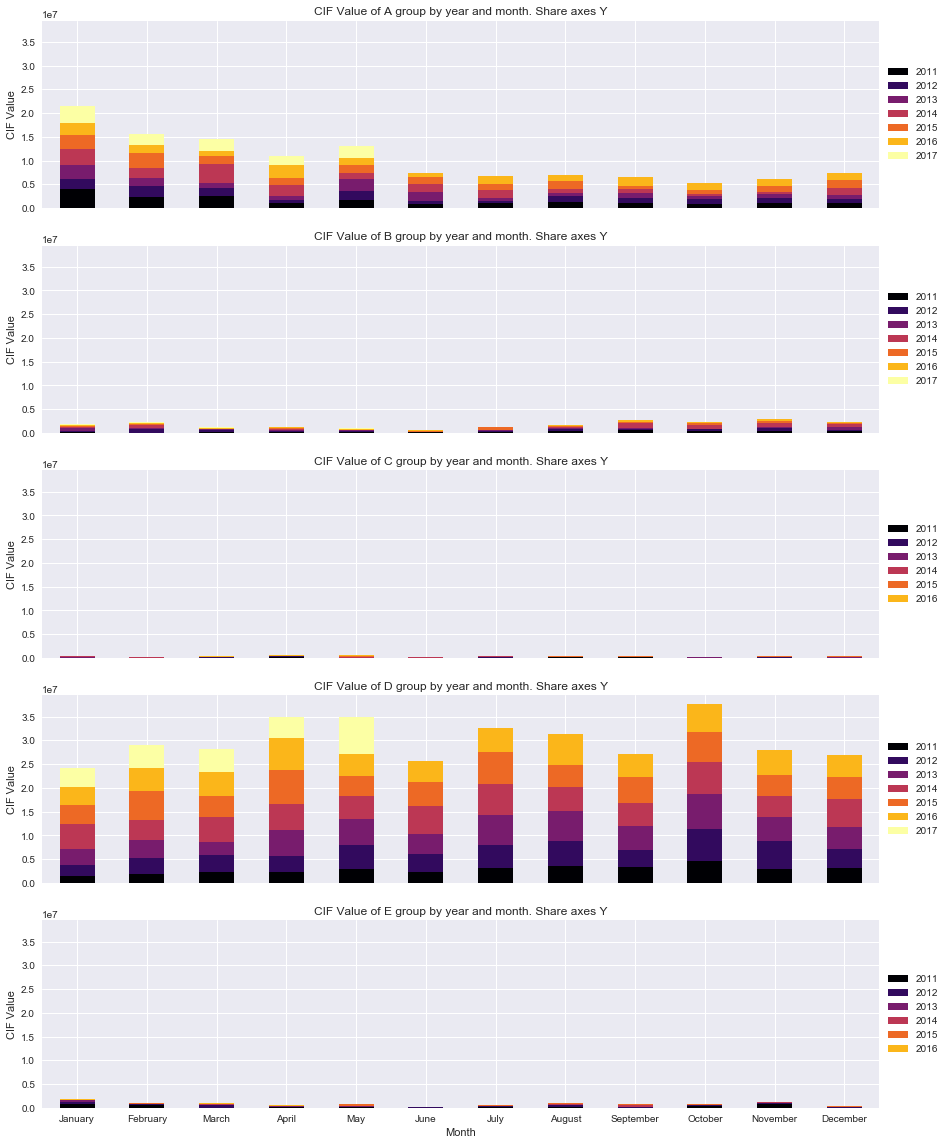

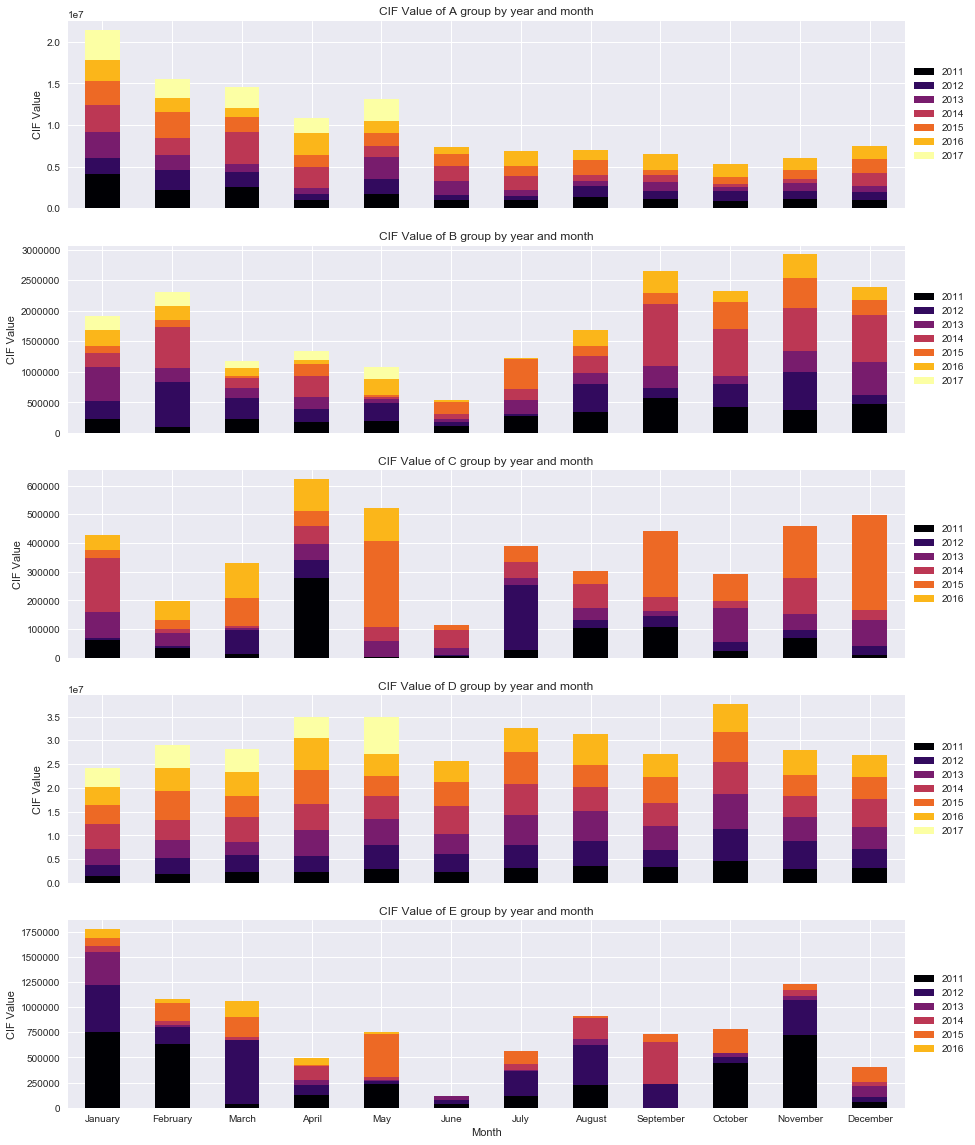

----- CIF Value del grupo A ------

              CIF                                                                        
YEAR         2011        2012        2013        2014        2015        2016        2017
MONTH                                                                                    
1      4107453.09  1934042.24  3073409.83  3259341.56  2939880.89  2534217.88  3635775.63
2      2231282.54  2349672.44  1841579.62  2010562.21  3076777.19  1674316.83  2314284.72
3      2529171.18  1776088.99   965431.18  3908926.47  1823045.84  1015984.86  2540196.38
4       998374.99   634156.90   813465.03  2435317.40  1477690.21  2703036.47  1794480.96
5      1747558.98  1804068.28  2592299.98  1291645.46  1557694.18  1542132.69  2546060.25
6       939026.04   593733.59  1770237.12  1781739.19  1397195.33   869623.20         NaN
7      1008977.46   381110.18   768316.01  1687492.92  1201164.36  1794196.97         NaN
8      1325674.37  1301521.08   596656.27   755487.28  1787333.1

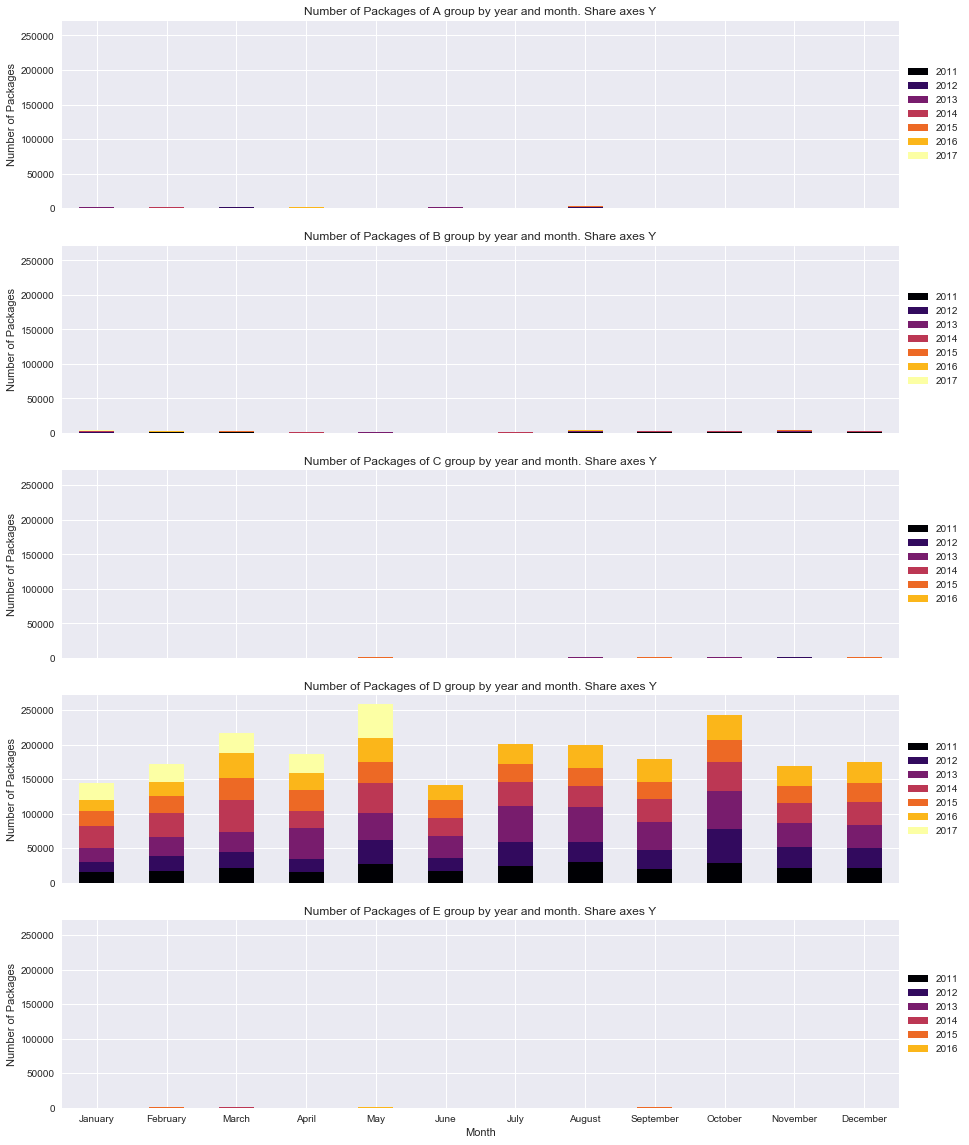

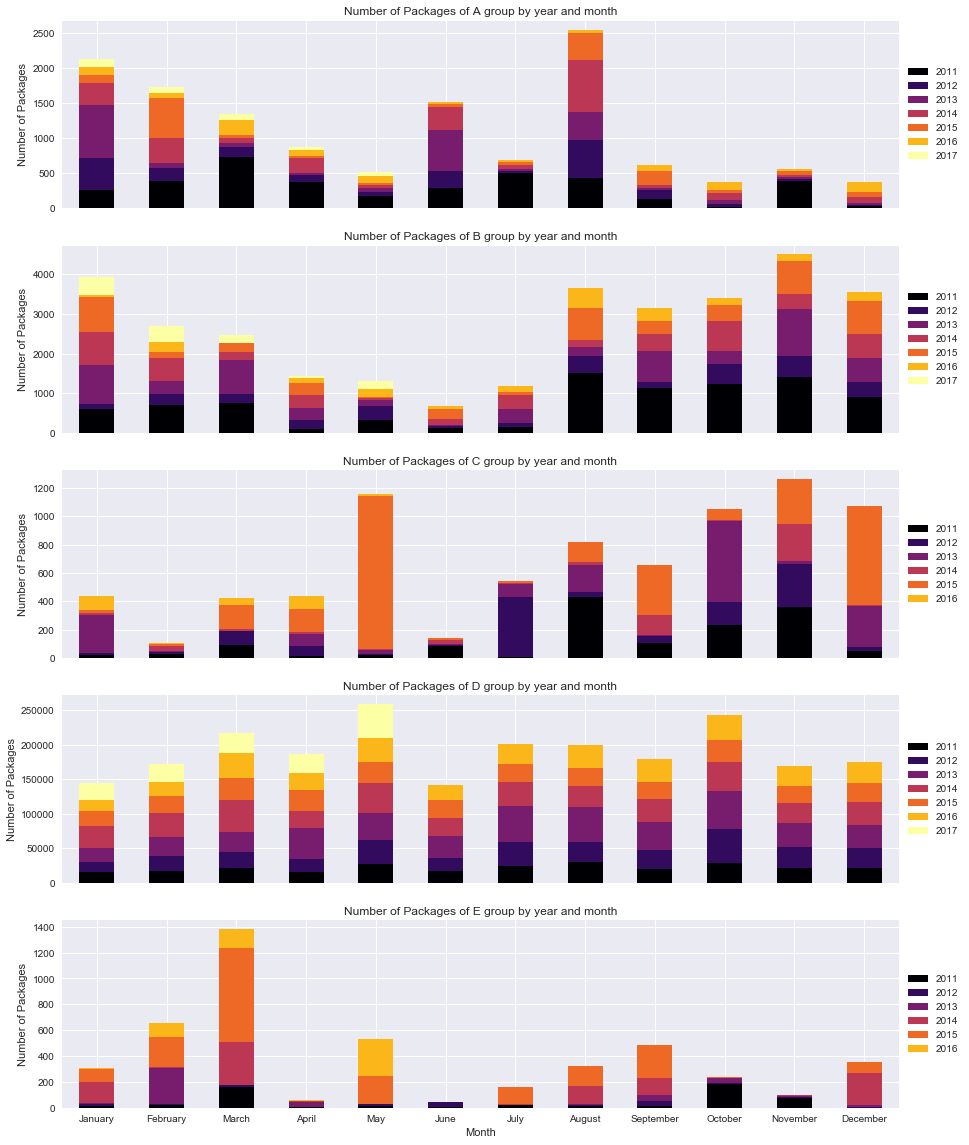

----- Number of Packages del grupo A ------

      CANT_BUL1                                          
YEAR       2011   2012   2013   2014   2015   2016   2017
MONTH                                                    
1         253.0  464.0  753.0  318.0  119.0  105.0  111.0
2         390.0  184.0   67.0  355.0  572.0   74.0   87.0
3         726.0  141.0   65.0   74.0   41.0  214.0   83.0
4         372.0  101.0   31.0  209.0   37.0   81.0   43.0
5         177.0   49.0   67.0   34.0   38.0   93.0   60.0
6         281.0  251.0  585.0  322.0   47.0   36.0    NaN
7         501.0   23.0   29.0   62.0   38.0   39.0    NaN
8         430.0  546.0  394.0  742.0  388.0   51.0    NaN
9         130.0  128.0   26.0   47.0  200.0   79.0    NaN
10         21.0   41.0   46.0  104.0   53.0  110.0    NaN
11        386.0   35.0   27.0   23.0   52.0   38.0    NaN
12         25.0   23.0   19.0   94.0   70.0  141.0    NaN

----- Number of Packages del grupo B ------

      CANT_BUL1                        

In [34]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["YEAR", "MONTH", "FOB", "CIF", "CANT_BUL1", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
 
colors = plt.cm.inferno(np.linspace(0, 1, 7))

for element,text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("CANT_BUL1", "Number of Packages")]:
    
    print("{} {} {}".format("-"*50, text, "-"*50)) 
    
    fig, axes_month_share_y = plt.subplots(5, sharex=True, sharey=True)
    fig, axes_month = plt.subplots(5, sharex=True)

    i = 0
    
    tables = []
    
    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = data[data["GROUP"] == group]
        
        new_data_grouper = new_data[["YEAR", "MONTH", element]].groupby(['MONTH','YEAR']).sum()

        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month_share_y[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors)

        plot.set_title("{} of {} group by year and month. Share axes Y".format(text, group))
        plot.set_xlabel("Month")
        plot.set_ylabel(text)
        

        plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")
        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors)

        plot.set_title("{} of {} group by year and month".format(text, group))
        plot.set_xlabel("Month")
        plot.set_ylabel(text)
        

        plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")
        
        i += 1
        
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
        print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))

### How much we export from A, B, C, D and E by month?

-------------------------------------------------- Number of Packages --------------------------------------------------


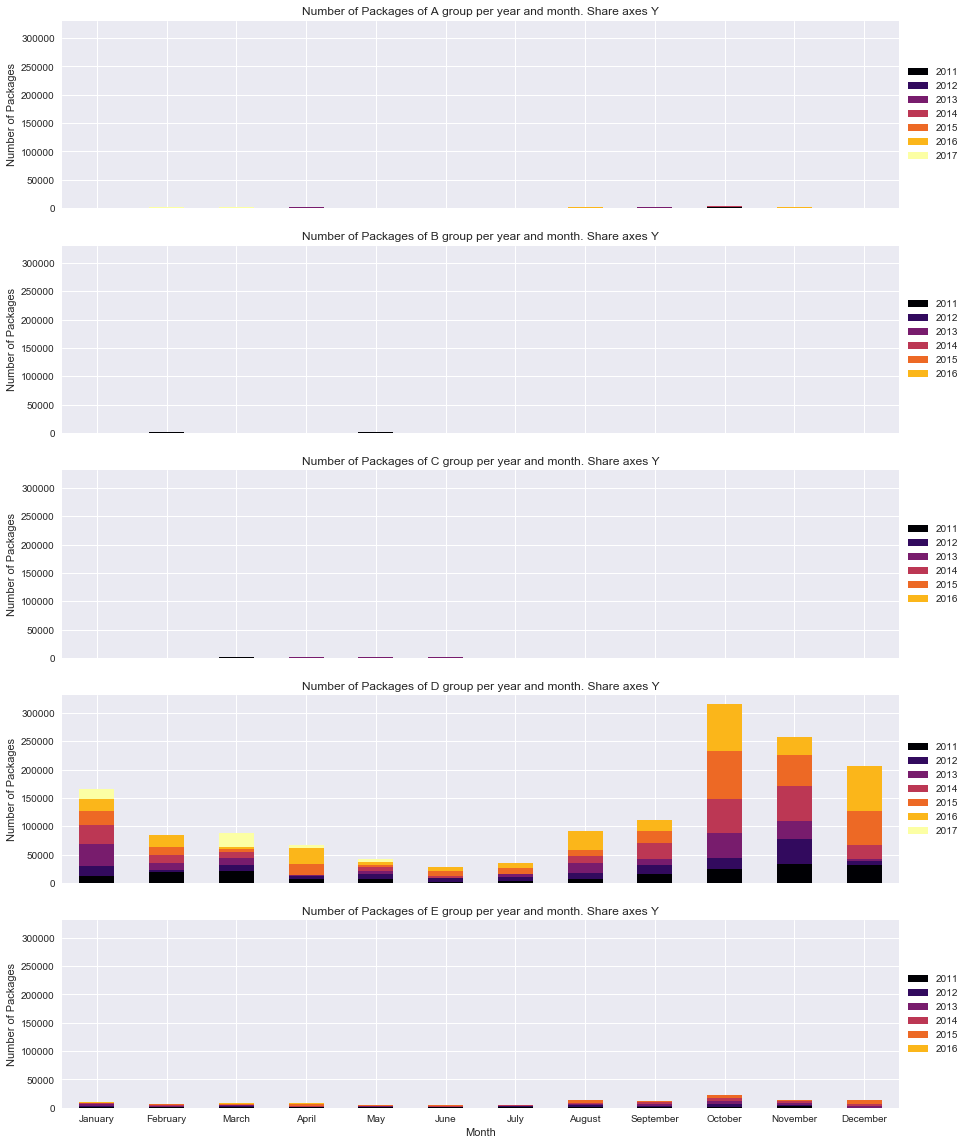

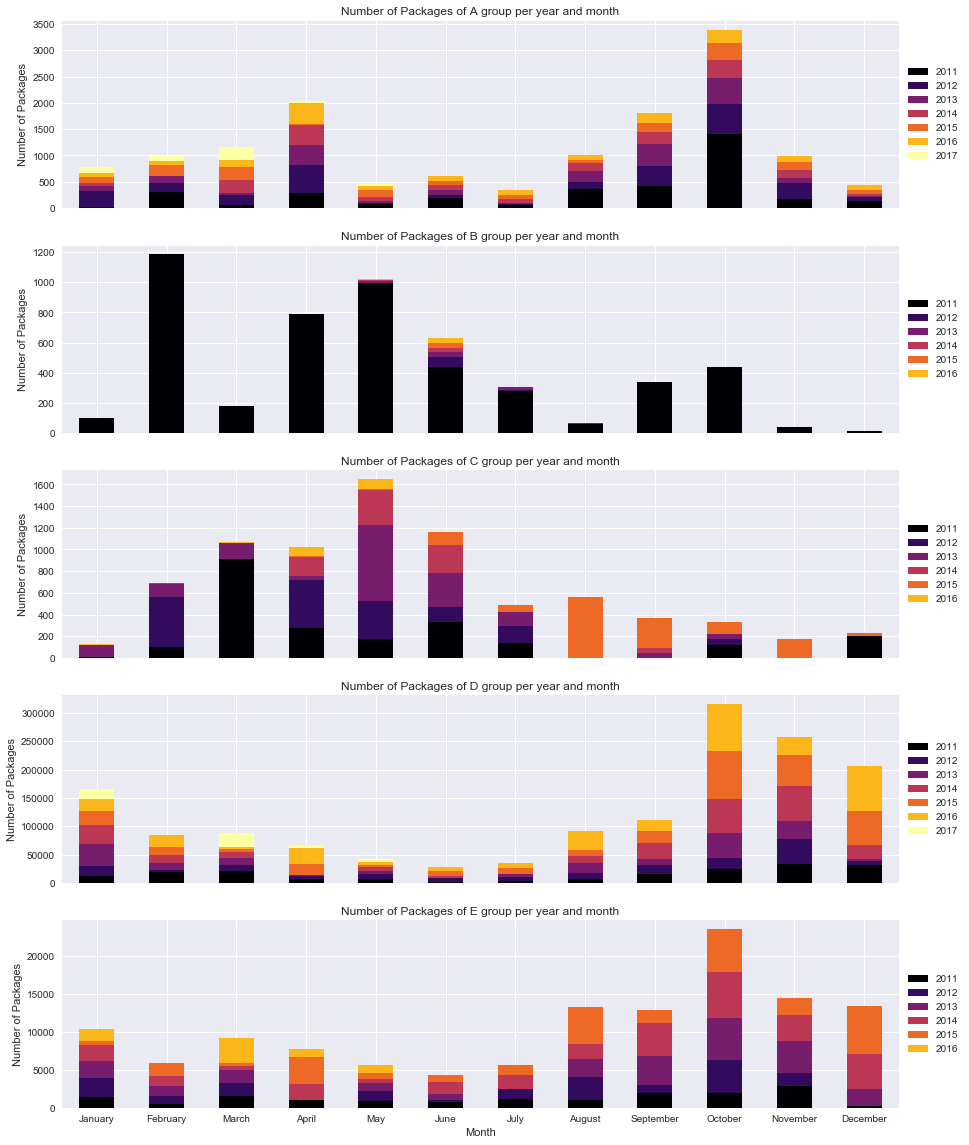

----- Number of Packages del grupo A ------

      TOTALBULTOS                                          
YEAR         2011   2012   2013   2014   2015   2016   2017
MONTH                                                      
1            27.0  300.0   93.0   61.0  110.0   73.0  110.0
2           305.0  178.0  129.0    1.0  207.0   66.0  111.0
3            64.0  176.0   37.0  255.0  244.0  146.0  235.0
4           283.0  537.0  370.0  396.0   15.0  396.0   35.0
5            69.0   34.0   23.0   81.0  130.0   80.0   35.0
6           196.0   51.0   94.0  102.0   79.0   83.0    NaN
7            66.0   10.0   23.0   79.0   66.0  107.0    NaN
8           363.0  137.0  196.0  164.0   58.0  100.0    NaN
9           415.0  379.0  433.0  221.0  171.0  187.0    NaN
10         1408.0  570.0  488.0  354.0  319.0  257.0    NaN
11          177.0  305.0   84.0  151.0  157.0  118.0    NaN
12          130.0   84.0   24.0   20.0   78.0   99.0    NaN

----- Number of Packages del grupo B ------

      TOT

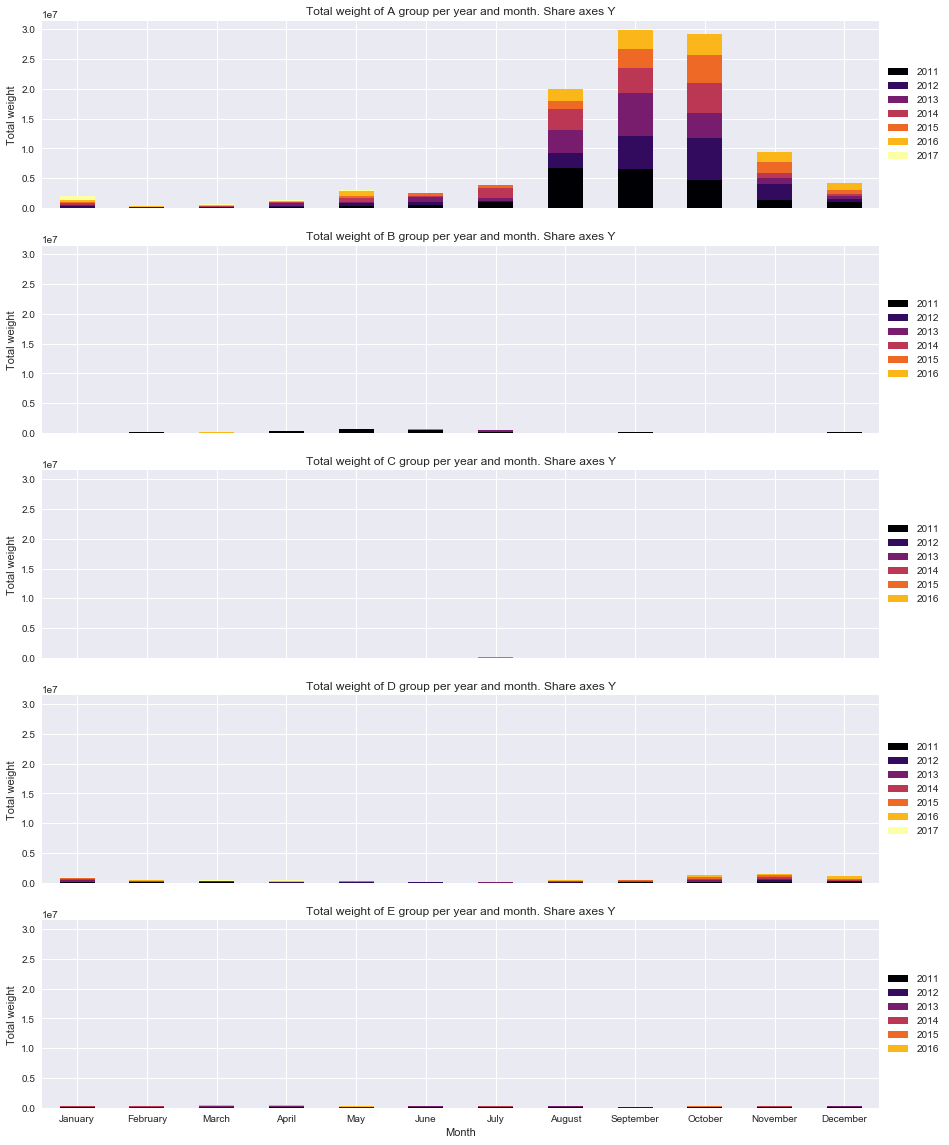

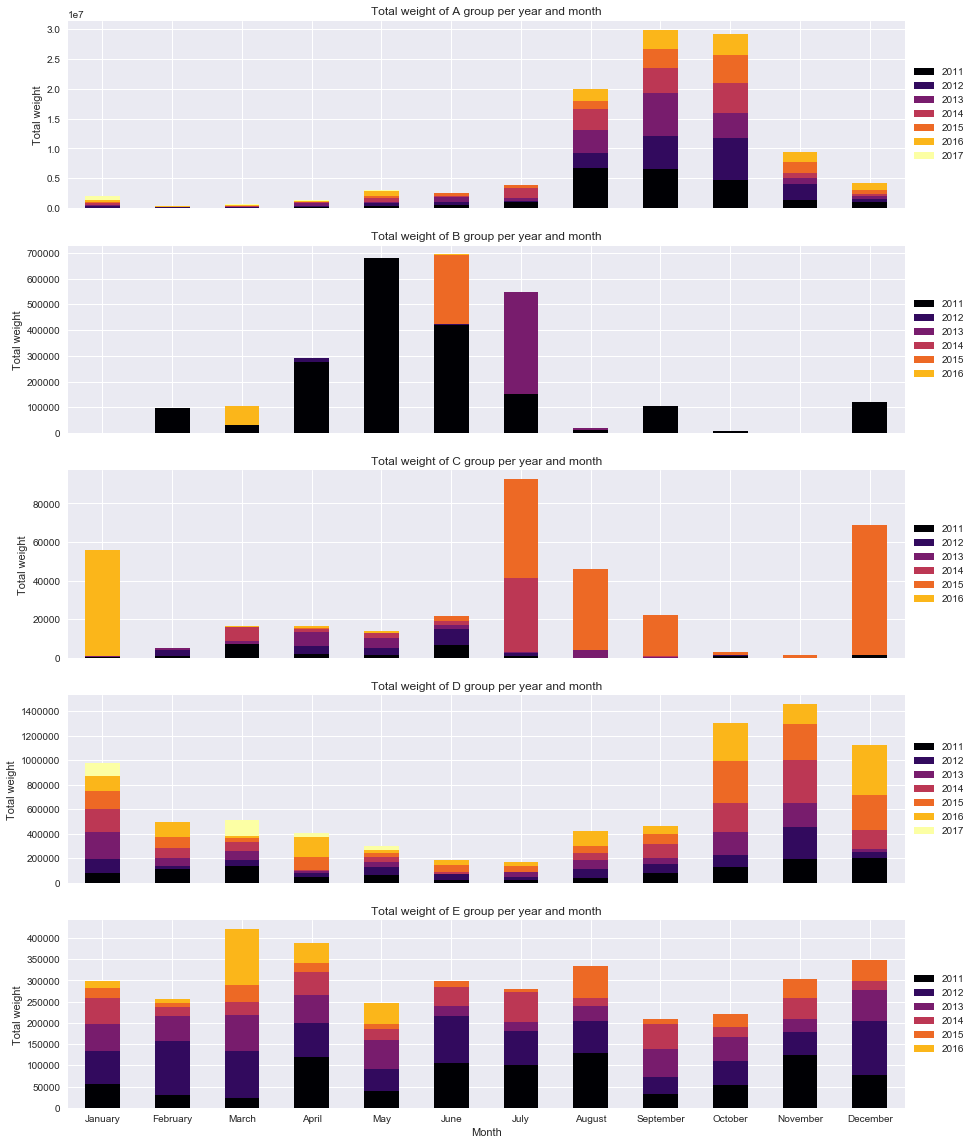

----- Total weight del grupo A ------

      PESOBRUTOTOTAL                                                                      
YEAR            2011       2012        2013        2014        2015        2016       2017
MONTH                                                                                     
1           59906.00   260620.0   267040.00   221055.00   227351.00   313910.50  594882.50
2           23790.00   182400.0    34574.00     8720.00     2164.00    44799.00   11070.00
3           79428.20    45238.0    84677.40    55965.96    93356.00   201755.00  129045.70
4          175087.00   216290.0   410319.23   133233.00   138880.00    78449.00  153189.99
5          407244.00   414382.0   165784.00   741457.11   374492.07   810897.60  153189.99
6          586133.00   468184.0   874760.00    74376.00   508612.00    77157.00        NaN
7         1060730.00   122514.0   436814.00  1709613.00   501484.00    44322.00        NaN
8         6715218.20  2463692.2  3981537.00  351531

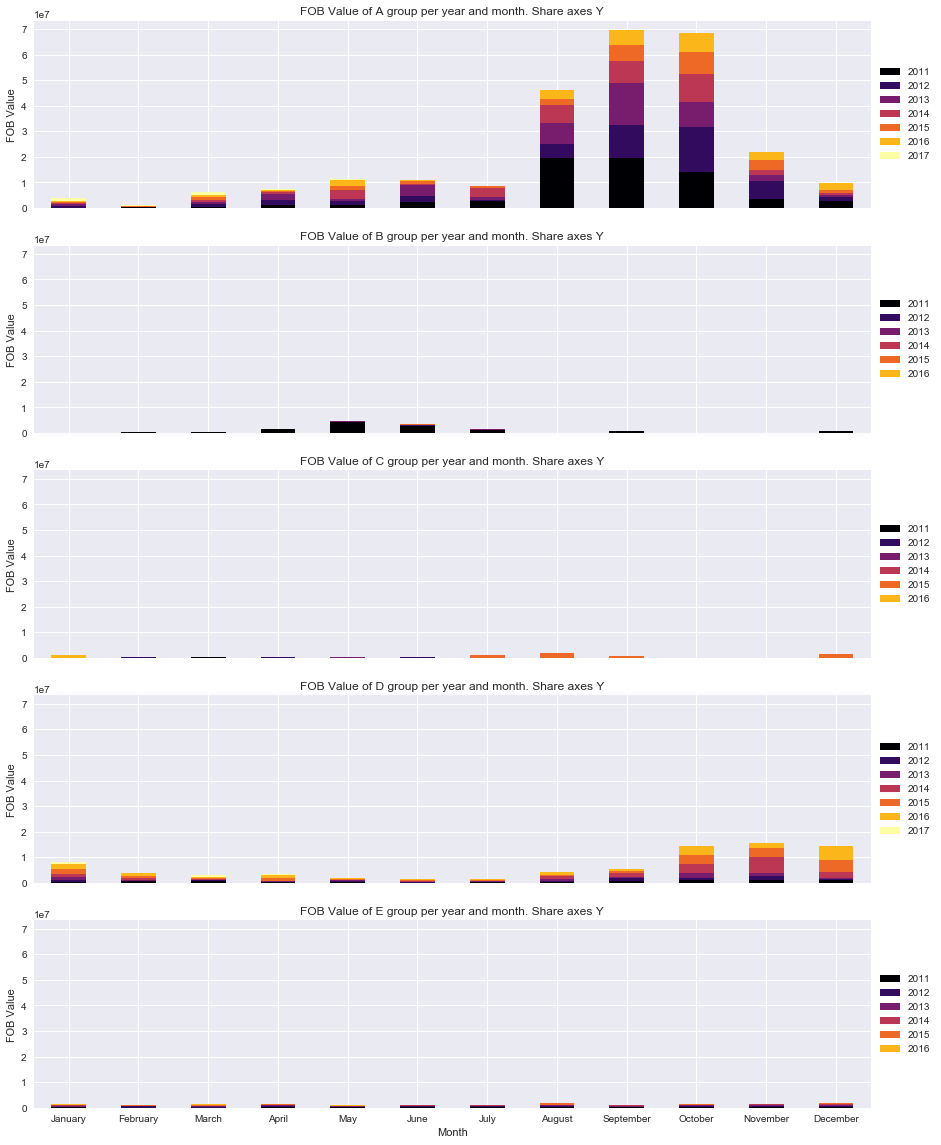

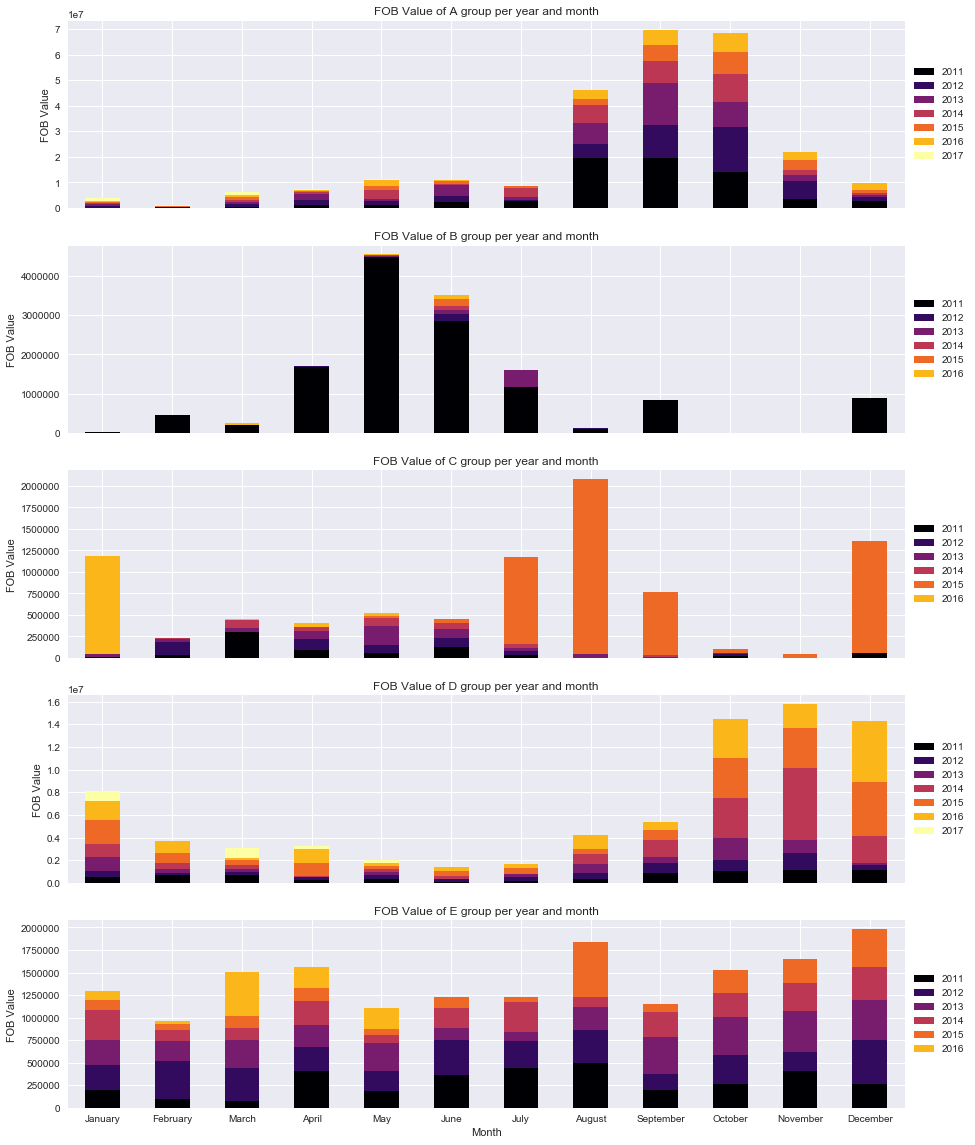

----- FOB Value del grupo A ------

      TOTALVALORFOB                                                                           
YEAR           2011         2012         2013         2014        2015        2016        2017
MONTH                                                                                         
1         109359.26    798348.93    618258.48    319458.90   333557.96   594066.49  1255157.47
2         214696.82    218256.73    130573.70     11697.61   211450.80   111724.29   206508.91
3         542863.92    980235.75    818131.23    977884.51   889103.46   925634.59   969346.76
4        1057427.99   2192950.12   2193185.68    850554.14   272090.20   601686.32   427440.70
5        1095211.53   1748003.46    654966.16   3714395.79  1219748.41  2568010.35   427440.70
6        2451311.93   2318499.62   4248276.02    404701.94  1323523.51   165790.09         NaN
7        2769774.63    303106.31   1163805.60   3422135.52   995059.94   141999.52         NaN
8       194046

In [35]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["YEAR","MONTH", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB", "GROUP"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)

colors = plt.cm.inferno(np.linspace(0, 1, 7))

for element,text in [("TOTALBULTOS",  "Number of Packages"),
                     ("PESOBRUTOTOTAL", "Total weight"),
                     ("TOTALVALORFOB", "FOB Value")]:
    
    print("{} {} {}".format("-"*50, text, "-"*50) ) 
    
    fig, axes_month_share_y = plt.subplots(5, sharex=True, sharey=True)
    fig, axes_month = plt.subplots(5, sharex=True)

    i = 0
    
    tables = []
    
    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = data[data["GROUP"] == group]
        
        new_data_grouper = new_data[["YEAR","MONTH", element]].groupby(["MONTH", 'YEAR']).sum()

        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month_share_y[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors)

        plot.set_title("{} of {} group per year and month. Share axes Y".format(text, group))
        plot.set_xlabel("Month")
        plot.set_ylabel(text)
        
        plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")
        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_month[i],
                                               stacked=True,
                                               figsize=(15, 20),
                                               color=colors)

        plot.set_title("{} of {} group per year and month".format(text, group))
        plot.set_xlabel("Month")
        plot.set_ylabel(text)
        
        plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
                     loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")
        
        i += 1
        
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
        print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))

### How much we export and import from A, B, C, D and E by year?

-------------------------------------------------- FOB Value --------------------------------------------------


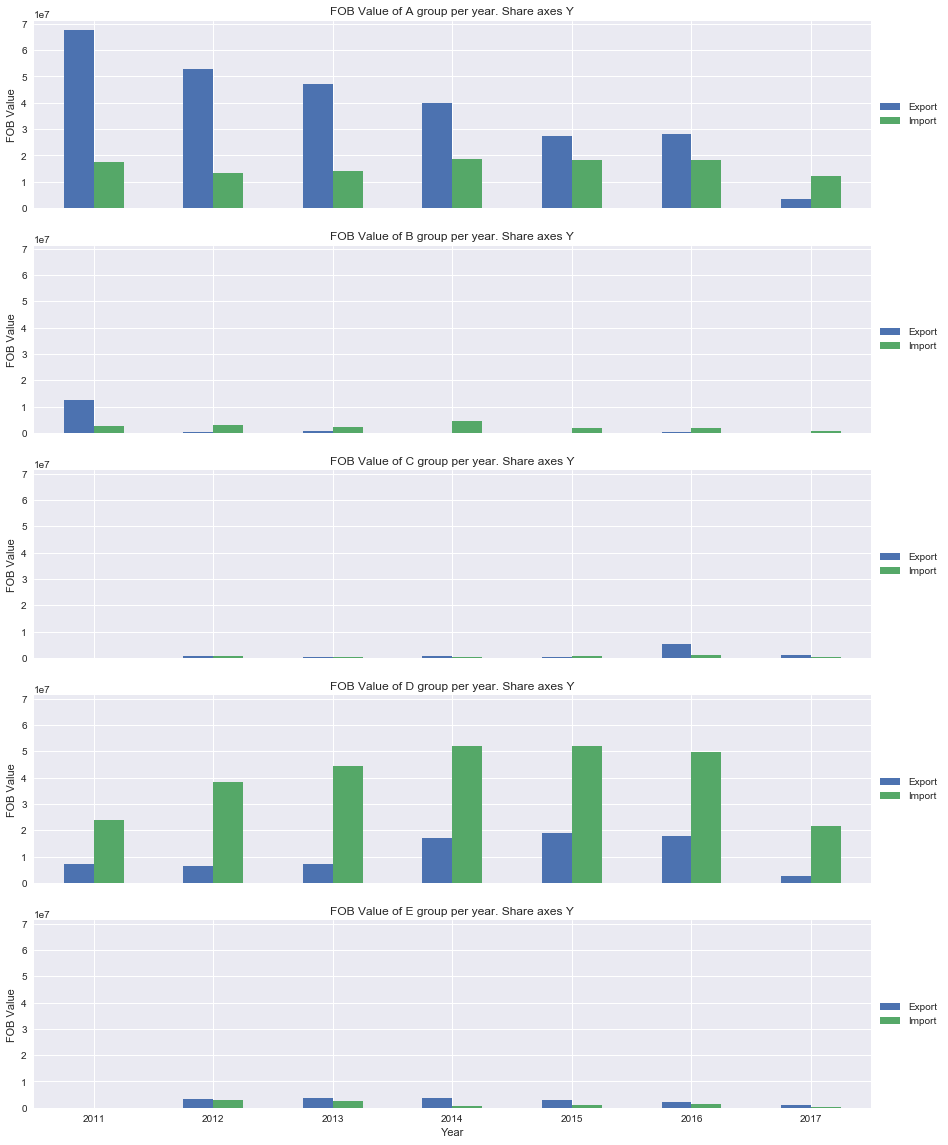

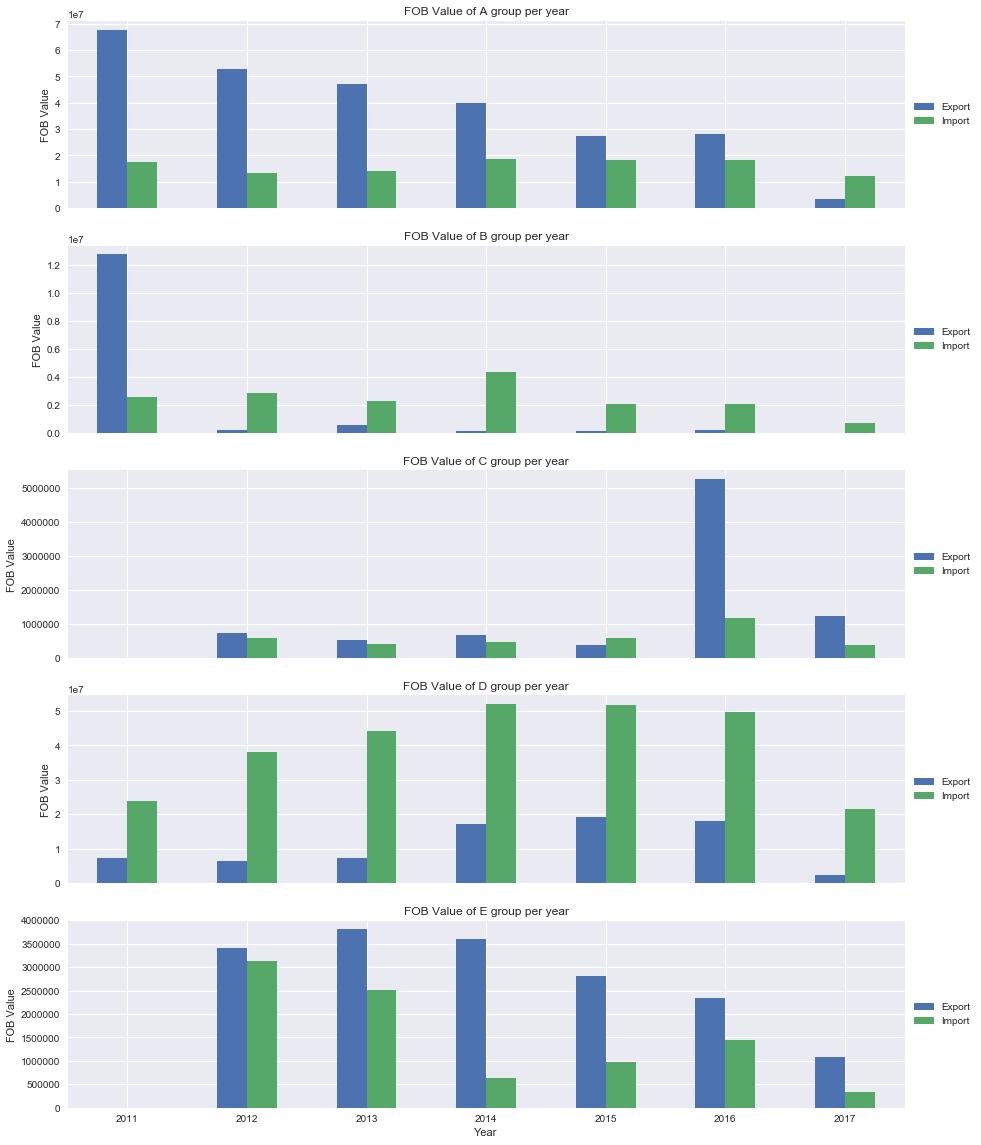

----- FOB Value del grupo A ------

              FOB             
TYPE       Export       Import
YEAR                          
2011  67828989.90  17309724.31
2012  52814289.75  13469915.13
2013  46952111.71  14220578.39
2014  39792691.63  18663180.65
2015  27362985.61  18205923.90
2016  28287807.41  18341156.64
2017   3285894.54  12052815.57

----- FOB Value del grupo B ------

              FOB            
TYPE       Export      Import
YEAR                         
2011  12718317.39  2566912.47
2012    239155.77  2882652.77
2013    588545.02  2263829.19
2014    118969.17  4376466.61
2015    167290.04  2075668.56
2016    194590.42  2036521.24
2017          NaN   698323.90

----- FOB Value del grupo C ------

             FOB            
TYPE      Export      Import
YEAR                        
2011        0.00        0.00
2012   723957.17   593060.81
2013   539077.66   418141.30
2014   663631.82   456761.39
2015   379213.72   577554.59
2016  5245543.37  1166512.70
2017  1218137.96   

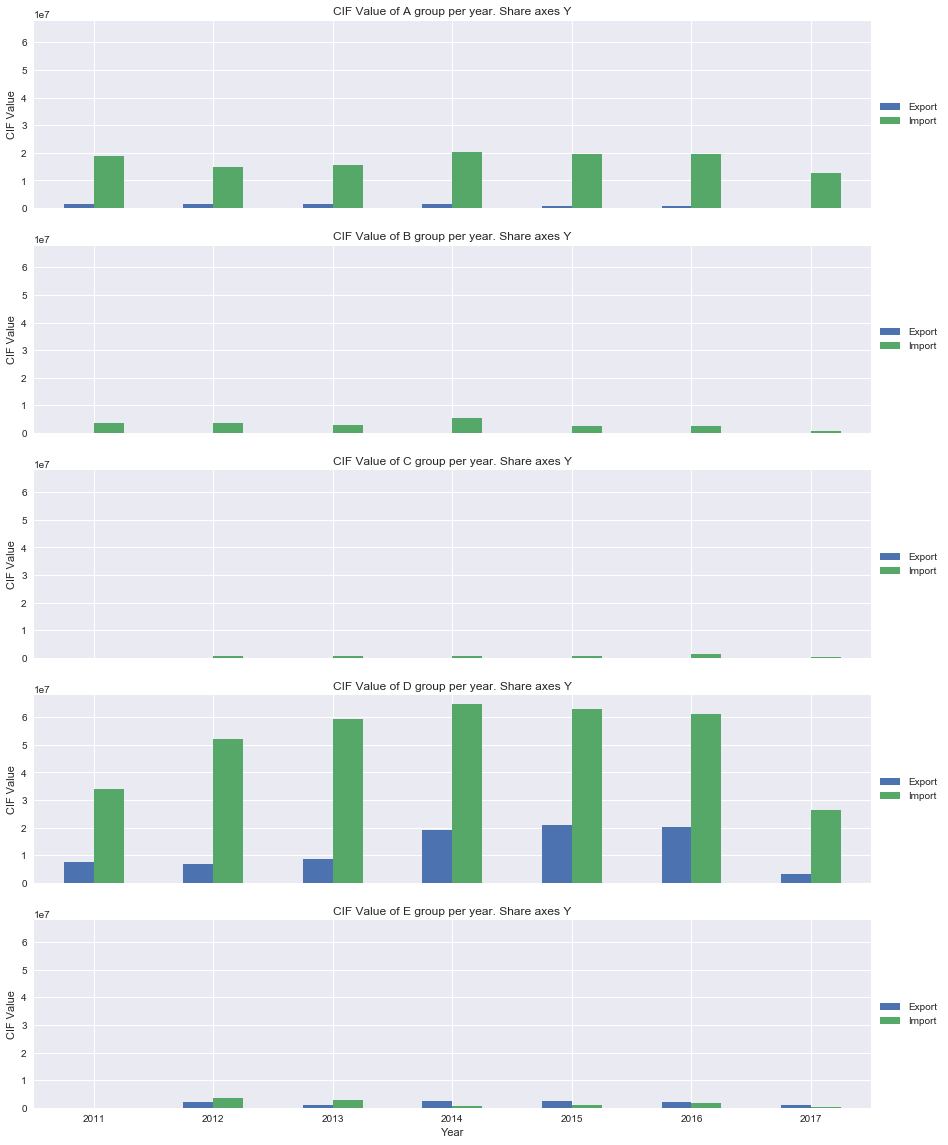

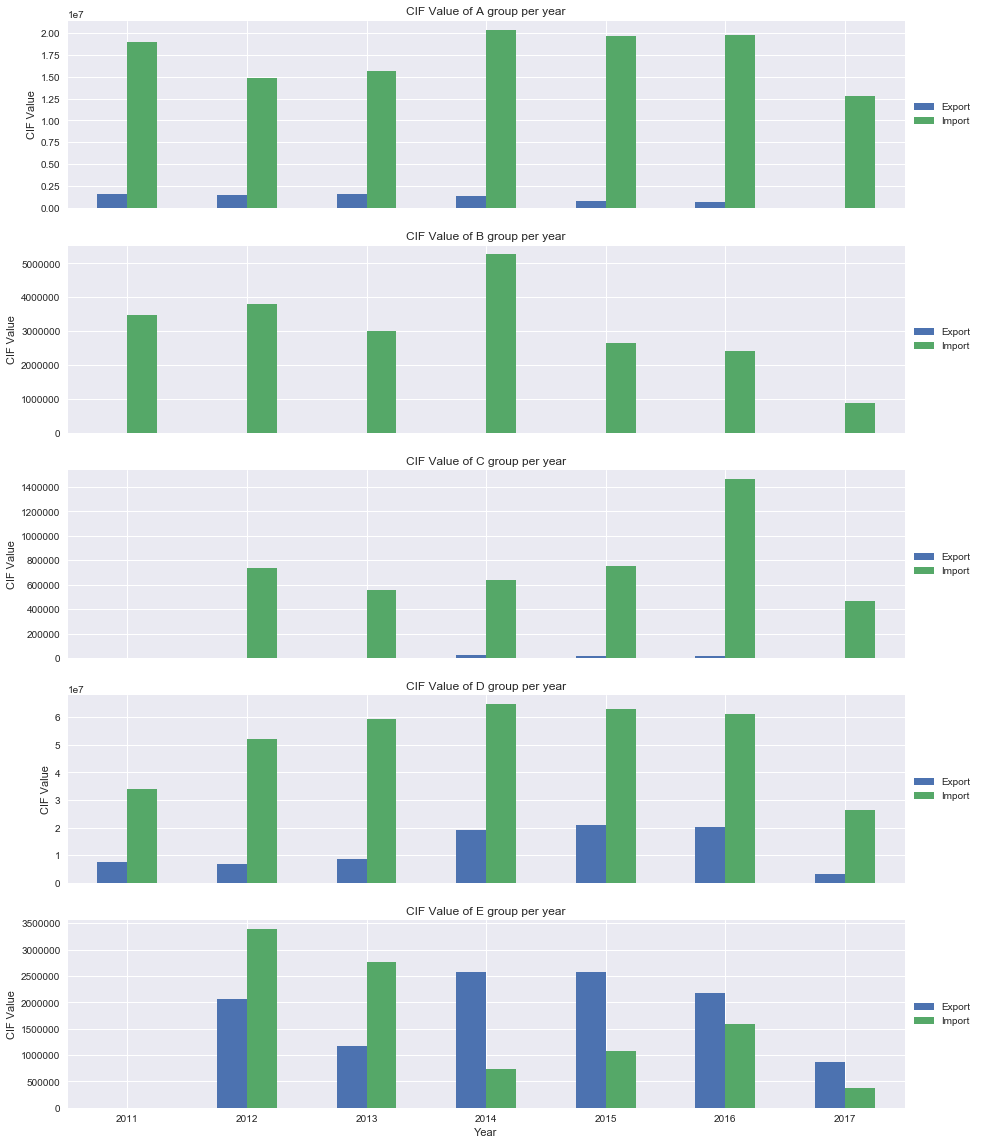

----- CIF Value del grupo A ------

             CIF             
TYPE      Export       Import
YEAR                         
2011  1549874.92  18909243.40
2012  1437361.79  14824201.89
2013  1553499.56  15635266.45
2014  1325736.25  20389765.19
2015   783076.93  19646835.20
2016   745586.27  19736597.77
2017    48970.35  12830797.94

----- CIF Value del grupo B ------

        CIF            
TYPE Export      Import
YEAR                   
2011    0.0  3489740.30
2012    0.0  3795678.43
2013    0.0  3012233.85
2014    0.0  5265446.49
2015    0.0  2664202.53
2016    0.0  2431777.31
2017    NaN   898469.48

----- CIF Value del grupo C ------

           CIF            
TYPE    Export      Import
YEAR                      
2011      0.00        0.00
2012      0.00   733279.54
2013      0.00   552458.17
2014  24665.12   634736.20
2015  13638.10   749487.16
2016  12735.00  1462245.95
2017      0.00   468637.10

----- CIF Value del grupo D ------

              CIF             
TYPE       E

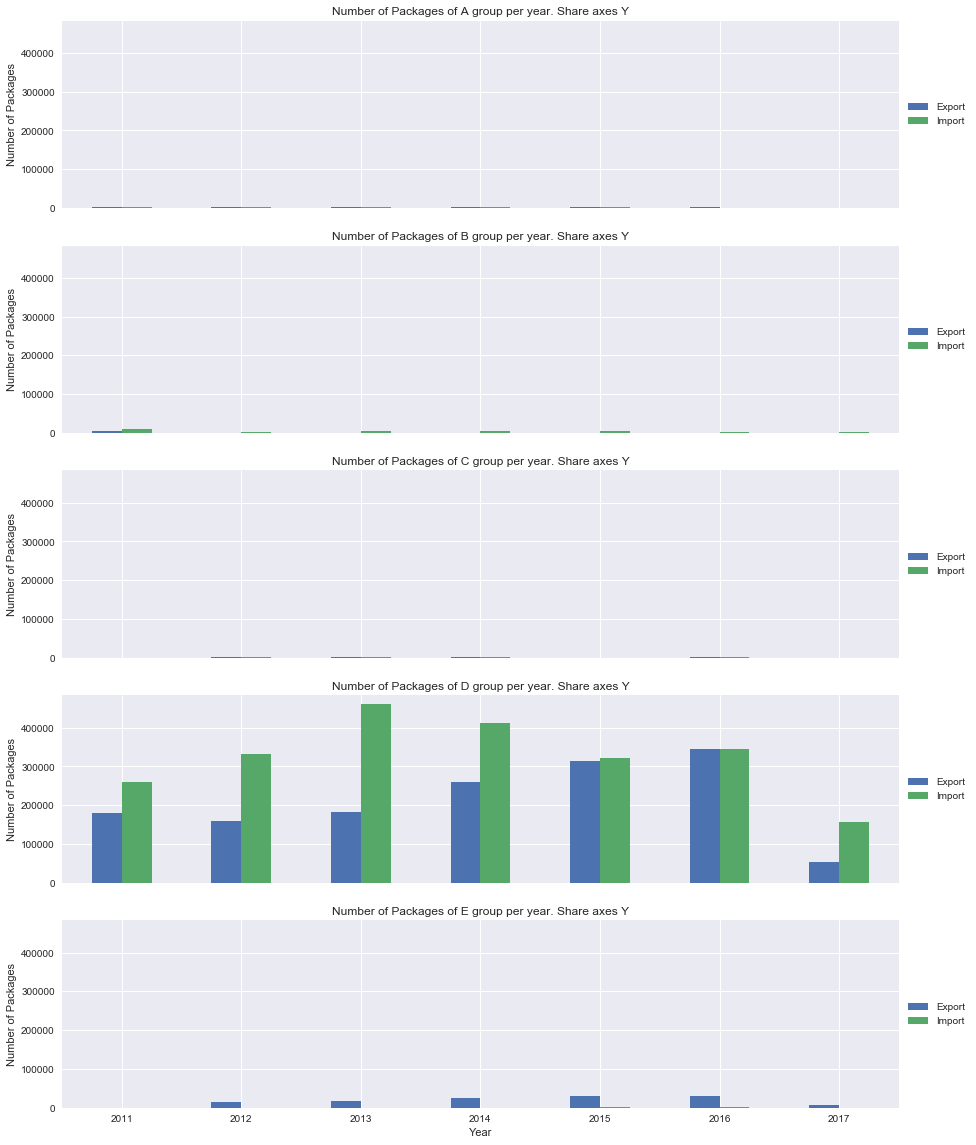

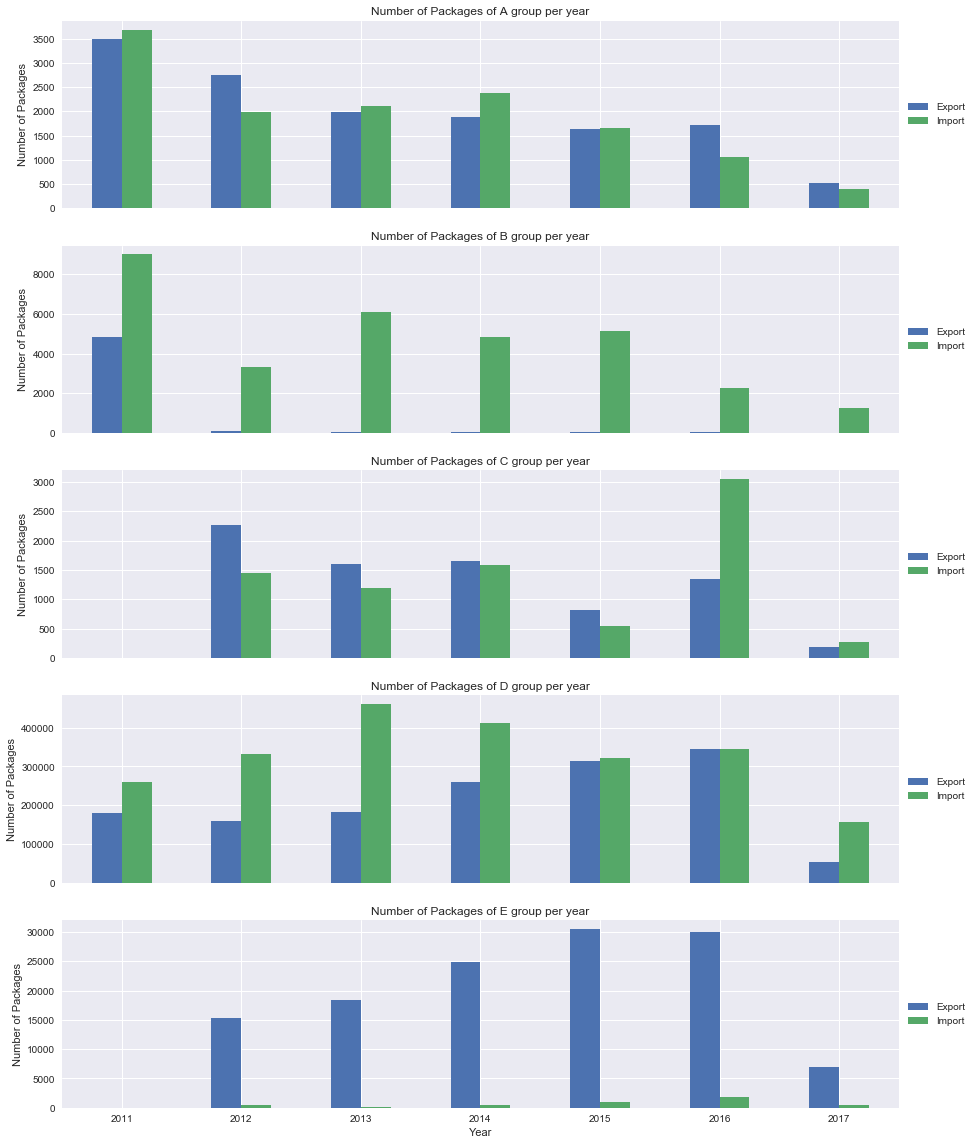

----- Number of Packages del grupo A ------

     BULTOS       
TYPE Export Import
YEAR              
2011   3503   3692
2012   2761   1986
2013   1994   2109
2014   1885   2384
2015   1634   1655
2016   1712   1061
2017    526    384

----- Number of Packages del grupo B ------

      BULTOS        
TYPE  Export  Import
YEAR                
2011  4848.0  9004.0
2012    80.0  3336.0
2013    63.0  6087.0
2014    32.0  4854.0
2015    31.0  5135.0
2016    46.0  2275.0
2017     NaN  1256.0

----- Number of Packages del grupo C ------

     BULTOS       
TYPE Export Import
YEAR              
2011      0      0
2012   2265   1450
2013   1598   1198
2014   1651   1582
2015    823    549
2016   1342   3044
2017    192    278

----- Number of Packages del grupo D ------

      BULTOS        
TYPE  Export  Import
YEAR                
2011  179995  260048
2012  158126  332190
2013  183725  459997
2014  259021  412091
2015  313119  322211
2016  344793  345822
2017   54626  156238

----- Number of 

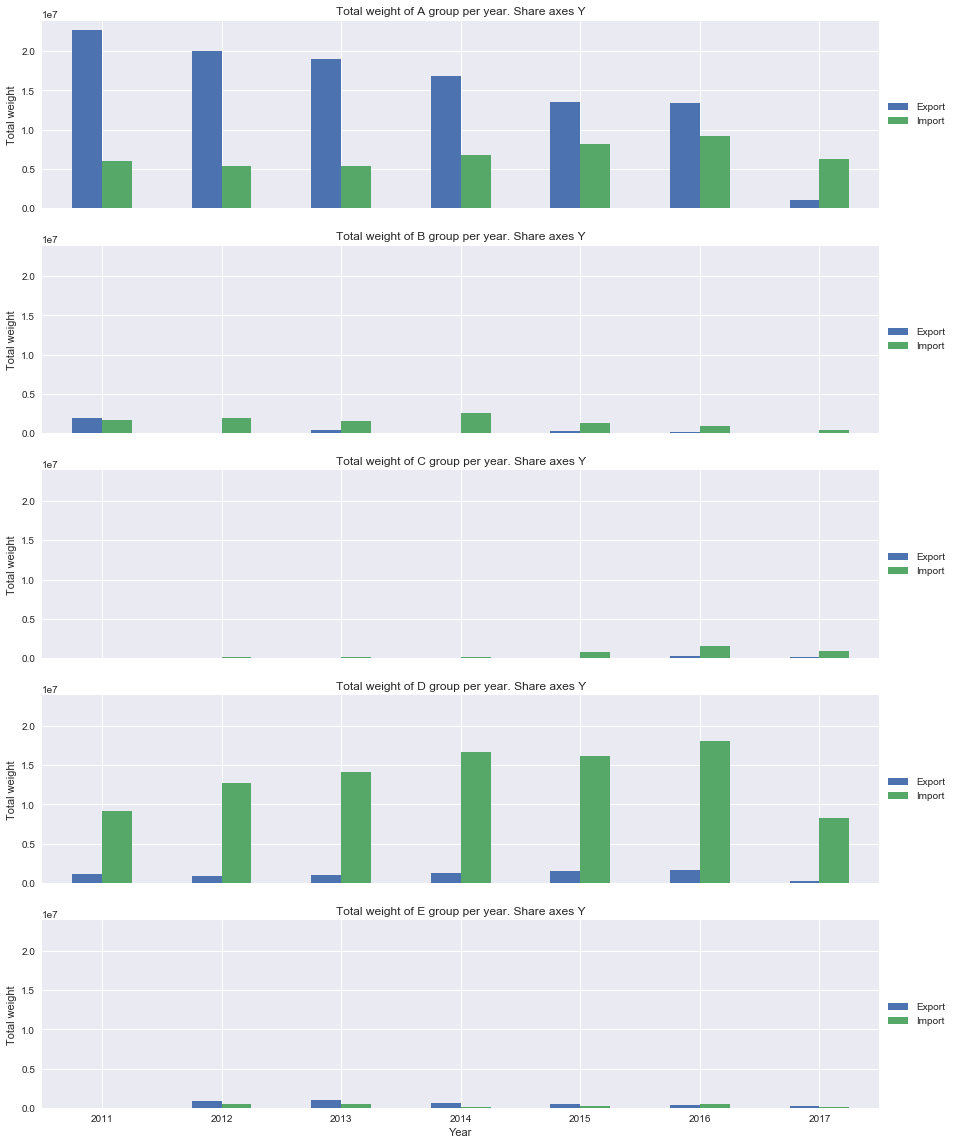

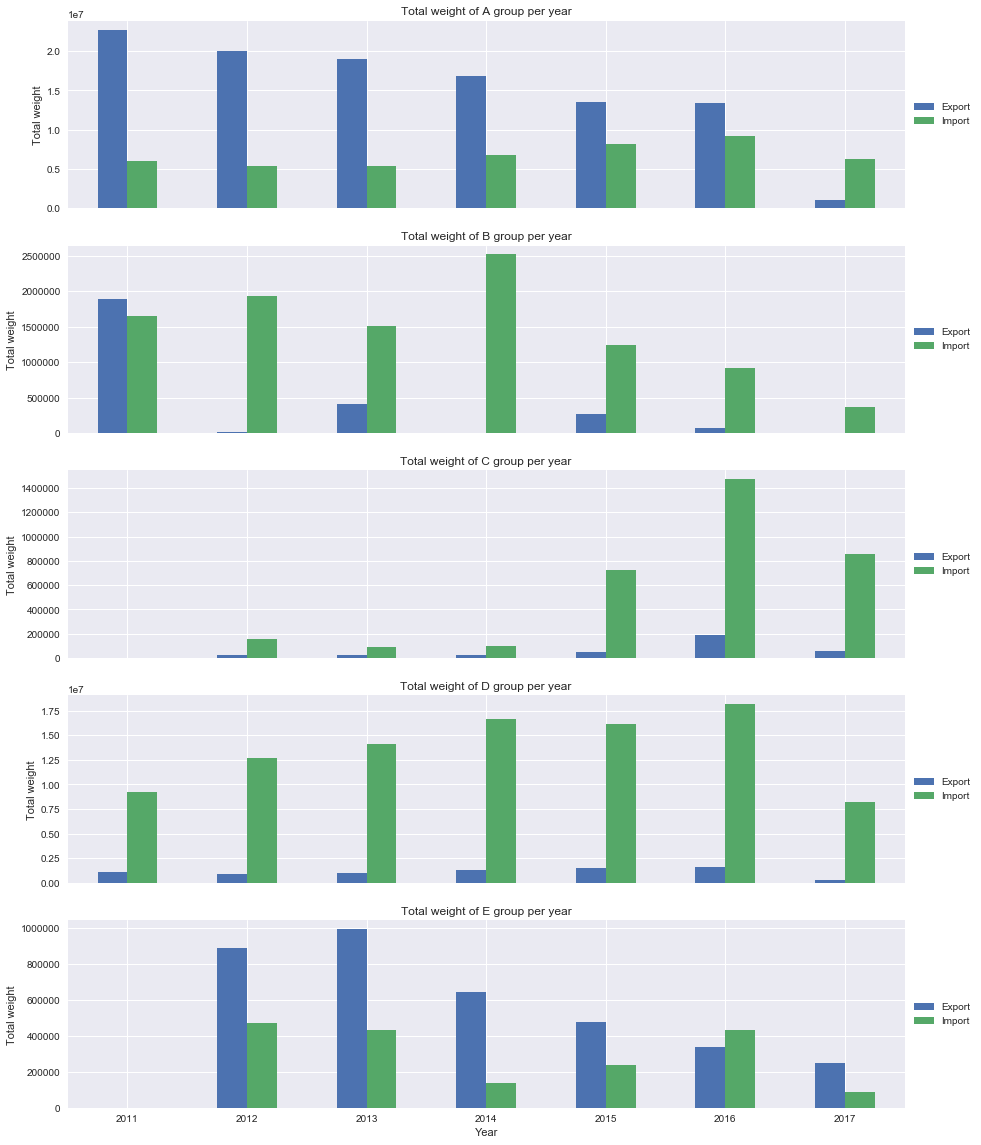

----- Total weight del grupo A ------

             PESO            
TYPE       Export      Import
YEAR                         
2011  22769250.78  5949038.63
2012  19978840.50  5393486.07
2013  19025808.70  5310456.20
2014  16816417.90  6751091.10
2015  13566733.44  8211330.65
2016  13393482.39  9189338.60
2017   1041378.18  6229683.57

----- Total weight del grupo B ------

            PESO            
TYPE      Export      Import
YEAR                        
2011  1895654.81  1651199.45
2012    19277.00  1930892.70
2013   403142.00  1515905.56
2014     1335.00  2518880.11
2015   268350.00  1247608.87
2016    75578.00   921746.22
2017         NaN   364364.35

----- Total weight del grupo C ------

           PESO            
TYPE     Export      Import
YEAR                       
2011       0.00        0.00
2012   22446.77   155309.00
2013   20602.08    88525.92
2014   24551.49    96178.21
2015   51773.84   720494.06
2016  187308.90  1470658.75
2017   56943.00   854532.97

----- Tota

In [27]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"

usecols_export =  ["YEAR", "TOTALBULTOS", "PESOBRUTOTOTAL", "TOTALVALORFOB", "VALORCIF", "GROUP"]
usecols_import =  ["YEAR", "FOB", "CIF", "CANT_BUL1", "TOT_PESO", "GROUP"]

data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['BULTOS', 'PESO', 'FOB', 'CIF', 'YEAR', "GROUP", 'TYPE']

data_import.columns = ['FOB', 'PESO', 'CIF', 'BULTOS', 'YEAR', "GROUP", 'TYPE']

final_data = pd.concat([data_import, data_export])

for element, text in [("FOB",  "FOB Value"),
                     ("CIF", "CIF Value"),
                     ("BULTOS", "Number of Packages"),
                     ("PESO", "Total weight")]:
    
    print("{} {} {}".format("-"*50, text, "-"*50) )
    
    fig, axes_year_share_y = plt.subplots(5, sharex=True, sharey=True)
    fig, axes_year = plt.subplots(5, sharex=True)

    i = 0
    
    tables = []

    for group in ["A", "B", "C", "D", "E"]:
        
        new_data = final_data[final_data["GROUP"] == group]
        
        new_data = new_data[["YEAR", "GROUP", "TYPE", element]]
        
        
        new_data_grouper = new_data.groupby(['YEAR', "TYPE"]).sum()
        
        for year in range(2011, 2018):
            if year not in new_data_grouper.index:
                new_data.loc[new_data.shape[0]] = [year, group, "Export", 0]
                new_data.loc[new_data.shape[0]] = [year, group, "Import", 0]
                
                new_data_grouper = new_data.groupby(['YEAR', "TYPE"]).sum()
                
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_year_share_y[i],
                                               figsize=(15, 20))

        plot.set_title("{} of {} group per year. Share axes Y".format(text, group))
        plot.set_xlabel("Year")
        plot.set_ylabel(text)
        
        plot.set_xticklabels(("2011", "2012", "2013", "2014", "2015", "2016", "2017"), rotation="horizontal")
        
        plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        
        plot = new_data_grouper.unstack().plot(kind='bar',
                                               ax=axes_year[i],
                                               figsize=(15, 20))

        plot.set_title("{} of {} group per year".format(text, group))
        plot.set_xlabel("Year")
        plot.set_ylabel(text)
        
        plot.set_xticklabels(("2011", "2012", "2013", "2014", "2015", "2016", "2017"), rotation="horizontal")
        
        plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        i+=1
                
        tables.append(new_data_grouper.unstack().to_string())
        
    plt.show()
    
    for table, group in zip(tables, ["A", "B", "C", "D", "E"]):
        print("----- {} del grupo {} ------\n\n{}\n".format(text, group, table))